In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
"""
数据准备
"""
folder_path = 'data_with_momentum_1hot'
file_list = glob.glob(f'{folder_path}/2023-wimbledon-*.csv')
dataframes = [pd.read_csv(file) for file in file_list]
combined_df = pd.concat(dataframes, ignore_index=True)

In [3]:
"""
特征工程：选取特征列
"""
# feature_columns = ['p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'p1_ace', 'p2_ace', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph']

feature_columns = ['p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'server', 'p1_ace', 'p2_ace', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph', 'serve_width_B', 'serve_width_BC', 'serve_width_BW', 'serve_width_C', 'serve_width_W', 'serve_depth_CTL', 'serve_depth_NCTL', 'return_depth_D', 'return_depth_ND']

y = combined_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
X = combined_df[feature_columns].copy()
for column in feature_columns:
    X[column].fillna(X[column].mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
"""
选择模型
"""
model = RandomForestRegressor()

# 训练模型
model.fit(X_train, y_train)

# 测试集预测
y_pred = model.predict(X_test)

# 使用 R² score 作为评估指标
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.5579716384857801


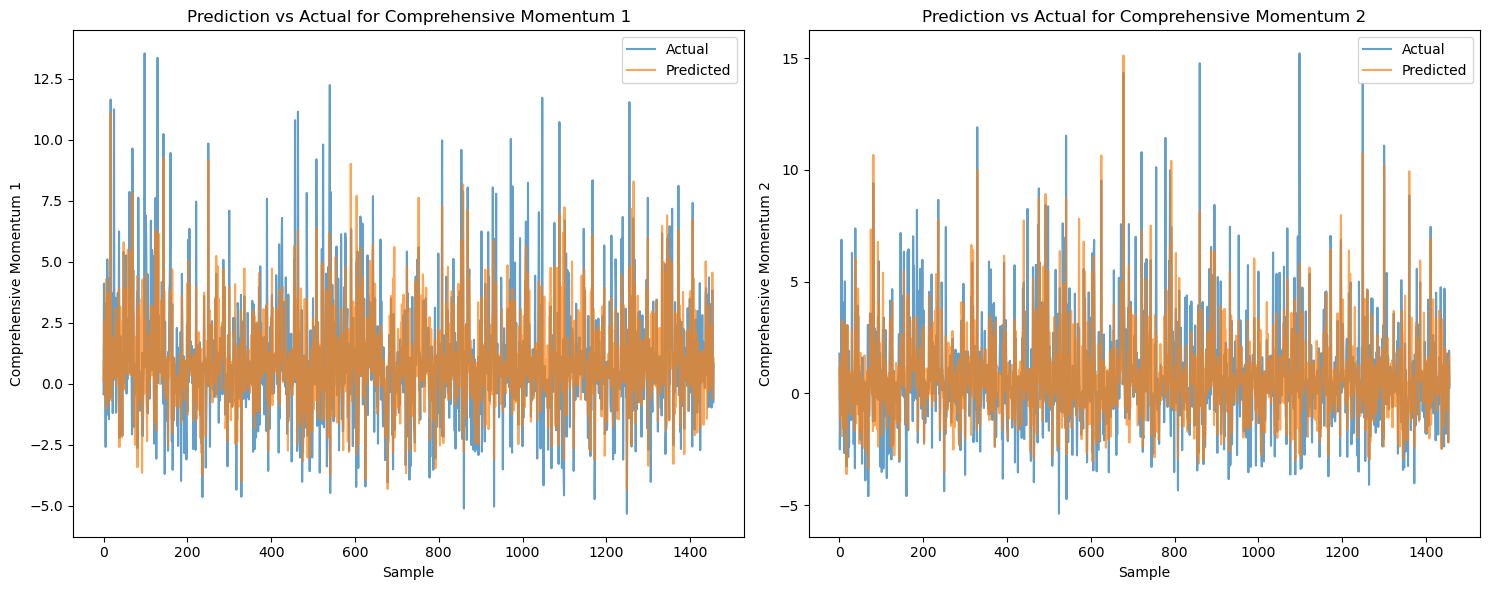

In [5]:
"""
可视化预测数据与实际数据的曲线
"""
plt.figure(figsize=(15, 6))

# 对于 comprehensive_momentum_1
plt.subplot(1, 2, 1)  # 1行2列的图表中的第一个
plt.plot(y_test['comprehensive_momentum_1'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 0], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 1')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 1')
plt.legend()

# 对于 comprehensive_momentum_2
plt.subplot(1, 2, 2)  # 1行2列的图表中的第二个
plt.plot(y_test['comprehensive_momentum_2'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 1], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 2')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 2')
plt.legend()

plt.tight_layout()
plt.show()

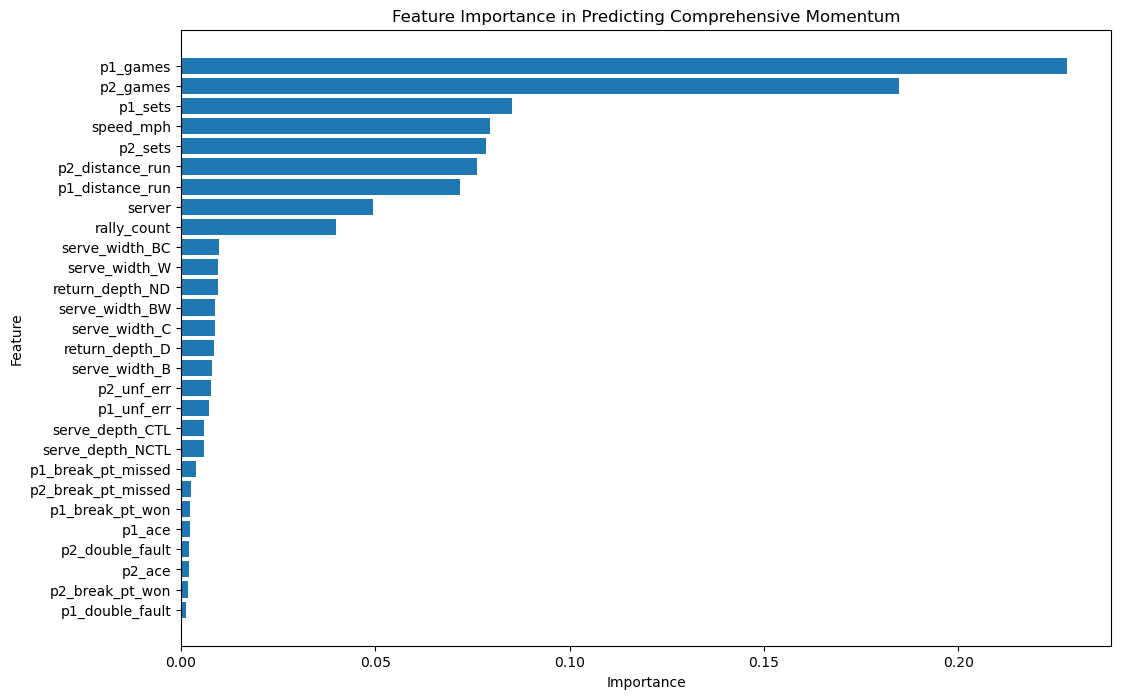

In [6]:
"""
特征重要性
"""
feature_importances = model.feature_importances_

# 将特征和其重要性组合为DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# 排序特征重要性
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Comprehensive Momentum')
plt.gca().invert_yaxis()
plt.show()

In [7]:
# new_feature = feature_importance_df[:9]
# feature_columns = new_feature.Feature

R² score: 0.5565331683176056


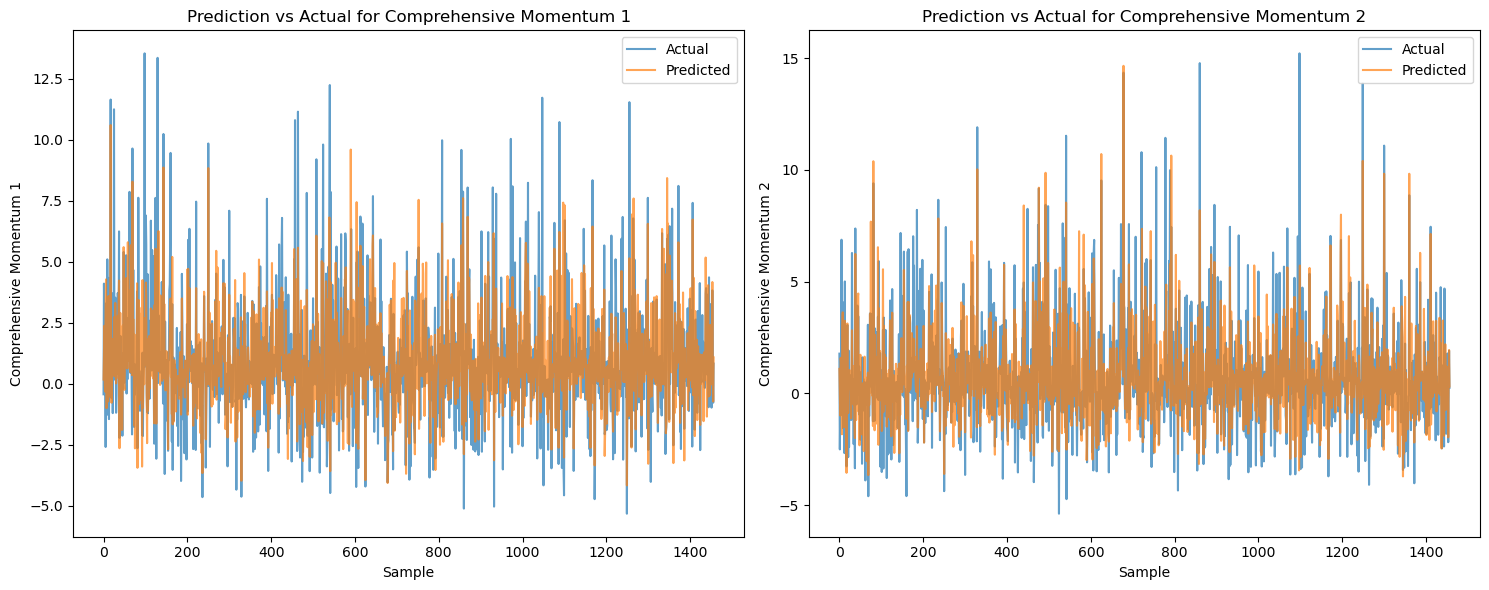

In [8]:
# 新特征
# X_train_new = combined_train_df[new_feature]
# X_test_new = combined_test_df[new_feature]
# y_train_new = combined_train_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
# y_test_new = combined_test_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]

# # 特征标准化
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


y = combined_df[['comprehensive_momentum_1', 'comprehensive_momentum_2']]
X = combined_df[feature_columns].copy()
for feature in feature_columns:
    X[feature].fillna(X[feature].mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)





model = RandomForestRegressor()

# 训练模型
model.fit(X_train, y_train)

# 测试集预测
y_pred = model.predict(X_test)

# 使用 R² score 作为评估指标
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

plt.figure(figsize=(15, 6))

# 对于 comprehensive_momentum_1
plt.subplot(1, 2, 1)  # 1行2列的图表中的第一个
plt.plot(y_test['comprehensive_momentum_1'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 0], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 1')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 1')
plt.legend()

# 对于 comprehensive_momentum_2
plt.subplot(1, 2, 2)  # 1行2列的图表中的第二个
plt.plot(y_test['comprehensive_momentum_2'].values, label='Actual', alpha=0.7)
plt.plot(y_pred[:, 1], label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual for Comprehensive Momentum 2')
plt.xlabel('Sample')
plt.ylabel('Comprehensive Momentum 2')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
"""
找到交点
"""
def find_intersections_and_changes(y1, y2, threshold=0.5, neighborhood=20):
    intersections = []
    i = 0
    while i < len(y1) - 1:
        change_1 = y1[i] - y1[i-1]
        change_2 = y2[i] - y2[i-1]
        total_change = abs(change_1) + abs(change_2)

        if total_change > threshold:
            if ((y1[i-1] > y2[i-1]) and (y1[i] < y2[i])) or ((y1[i-1] < y2[i-1]) and (y1[i] > y2[i])):
                intersection_x = i
                intersection_y = y1[i] + (y2[i] - y1[i]) / 2
                
                # 检查之后的邻域是否有其他交点
                is_valid_after = True
                for j in range(1, neighborhood):
                    if i + j < len(y1):
                        future_change_1 = y1[i+j] - y1[i+j-1]
                        future_change_2 = y2[i+j] - y2[i+j-1]
                        future_total_change = abs(future_change_1) + abs(future_change_2)
                        if future_total_change > threshold:
                            if ((y1[i+j-1] > y2[i+j-1]) and (y1[i+j] < y2[i+j])) or ((y1[i+j-1] < y2[i+j-1]) and (y1[i+j] > y2[i+j])):
                                is_valid_after = False
                                break

                # 检查之前的邻域是否有其他交点
                is_valid_before = True
                for j in range(1, min(i, neighborhood)):
                    past_change_1 = y1[i-j] - y1[i-j-1]
                    past_change_2 = y2[i-j] - y2[i-j-1]
                    past_total_change = abs(past_change_1) + abs(past_change_2)
                    if past_total_change > threshold:
                        if ((y1[i-j-1] > y2[i-j-1]) and (y1[i-j] < y2[i-j])) or ((y1[i-j-1] < y2[i-j-1]) and (y1[i-j] > y2[i-j])):
                            is_valid_before = False
                            break

                if is_valid_after or is_valid_before:
                    intersections.append((intersection_x, intersection_y, change_1, change_2))
        i += 1
    return intersections

Match: 2023-wimbledon-1301.csv
Intersection 1: (x=32, y=0.58) - Change in Momentum 1: -0.30, Change in Momentum 2: 0.39
Match: 2023-wimbledon-1301.csv
Intersection 2: (x=46, y=0.54) - Change in Momentum 1: -0.67, Change in Momentum 2: 0.67
Match: 2023-wimbledon-1301.csv
Intersection 3: (x=74, y=0.81) - Change in Momentum 1: -1.86, Change in Momentum 2: 1.51
Match: 2023-wimbledon-1301.csv
Intersection 4: (x=99, y=0.8) - Change in Momentum 1: 0.60, Change in Momentum 2: -0.96
Match: 2023-wimbledon-1301.csv
Intersection 5: (x=109, y=0.75) - Change in Momentum 1: 0.30, Change in Momentum 2: -0.37
Match: 2023-wimbledon-1301.csv
Intersection 6: (x=131, y=0.8) - Change in Momentum 1: -3.21, Change in Momentum 2: 2.53
Match: 2023-wimbledon-1301.csv
Intersection 7: (x=135, y=0.77) - Change in Momentum 1: 0.29, Change in Momentum 2: -0.32
Match: 2023-wimbledon-1301.csv
Intersection 8: (x=158, y=1.01) - Change in Momentum 1: -0.92, Change in Momentum 2: 1.05
Match: 2023-wimbledon-1301.csv
Interse

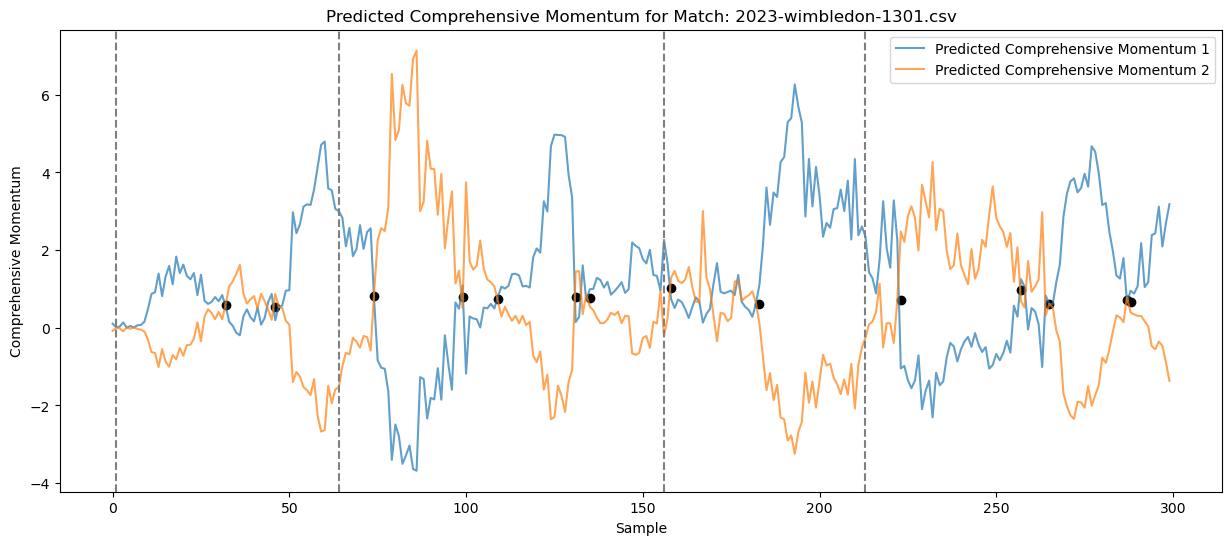

Match: 2023-wimbledon-1302.csv
Intersection 1: (x=26, y=0.53) - Change in Momentum 1: 0.65, Change in Momentum 2: -0.62
Match: 2023-wimbledon-1302.csv
Intersection 2: (x=36, y=0.51) - Change in Momentum 1: -0.47, Change in Momentum 2: 0.47
Match: 2023-wimbledon-1302.csv
Intersection 3: (x=64, y=0.69) - Change in Momentum 1: 0.34, Change in Momentum 2: -0.55
Match: 2023-wimbledon-1302.csv
Intersection 4: (x=112, y=0.58) - Change in Momentum 1: -0.63, Change in Momentum 2: 0.64
Match: 2023-wimbledon-1302.csv
Intersection 5: (x=136, y=0.75) - Change in Momentum 1: 0.86, Change in Momentum 2: -0.96


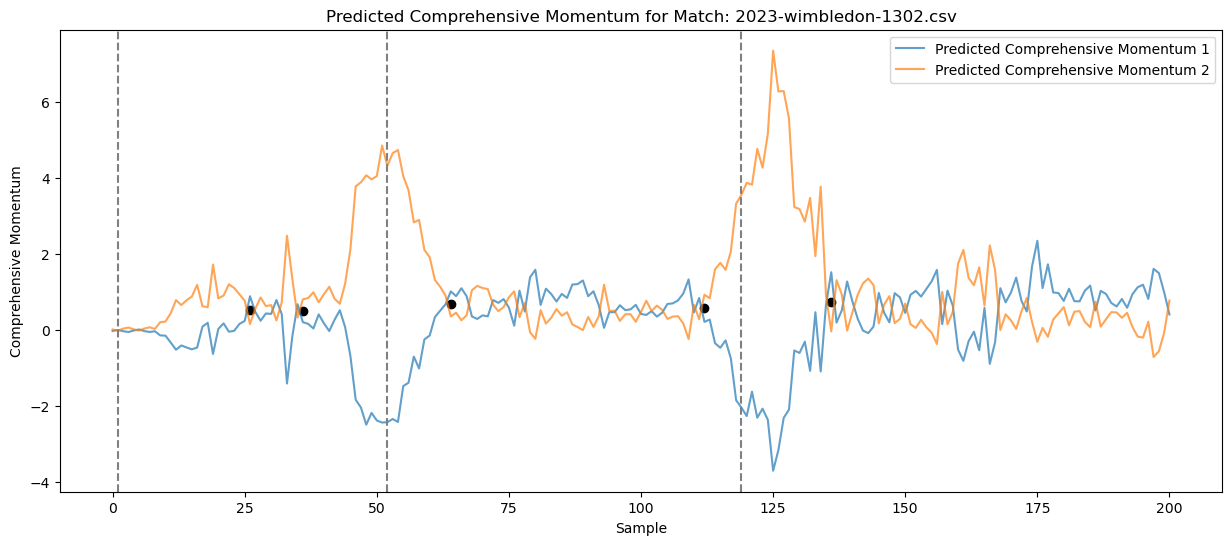

Match: 2023-wimbledon-1303.csv
Intersection 1: (x=10, y=0.45) - Change in Momentum 1: 1.08, Change in Momentum 2: -0.92
Match: 2023-wimbledon-1303.csv
Intersection 2: (x=35, y=0.55) - Change in Momentum 1: -1.46, Change in Momentum 2: 1.47
Match: 2023-wimbledon-1303.csv
Intersection 3: (x=73, y=0.74) - Change in Momentum 1: 0.79, Change in Momentum 2: -0.87
Match: 2023-wimbledon-1303.csv
Intersection 4: (x=77, y=0.56) - Change in Momentum 1: -0.96, Change in Momentum 2: 0.86
Match: 2023-wimbledon-1303.csv
Intersection 5: (x=98, y=0.53) - Change in Momentum 1: 1.23, Change in Momentum 2: -1.49
Match: 2023-wimbledon-1303.csv
Intersection 6: (x=111, y=0.59) - Change in Momentum 1: -1.92, Change in Momentum 2: 1.86


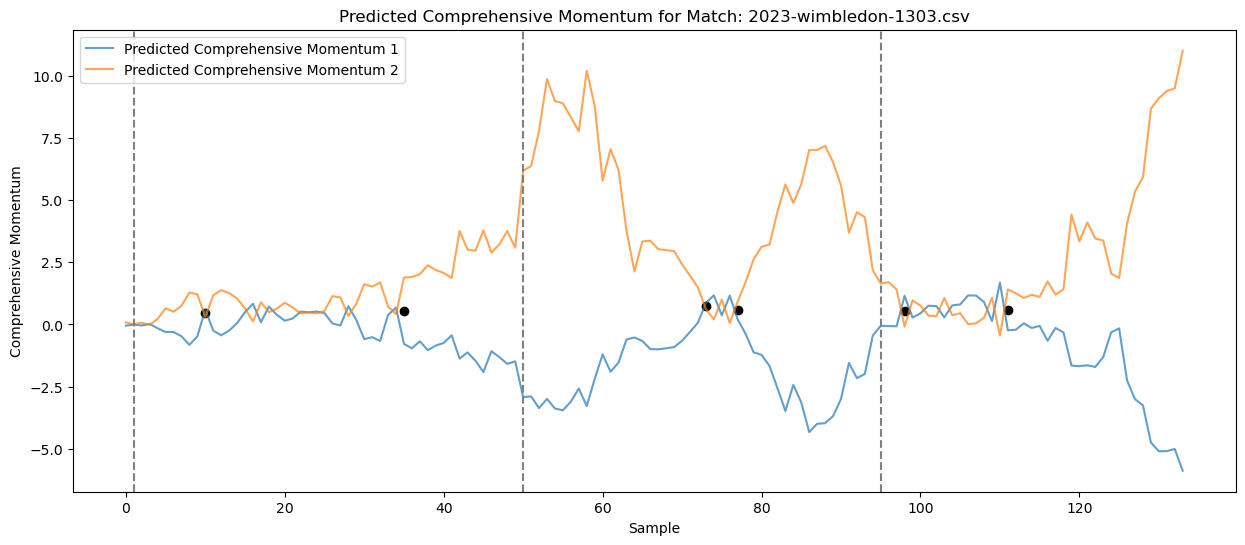

Match: 2023-wimbledon-1304.csv
Intersection 1: (x=25, y=0.56) - Change in Momentum 1: -0.40, Change in Momentum 2: 0.39
Match: 2023-wimbledon-1304.csv
Intersection 2: (x=42, y=0.64) - Change in Momentum 1: -0.57, Change in Momentum 2: 0.69
Match: 2023-wimbledon-1304.csv
Intersection 3: (x=71, y=1.47) - Change in Momentum 1: 3.66, Change in Momentum 2: -3.21
Match: 2023-wimbledon-1304.csv
Intersection 4: (x=270, y=0.57) - Change in Momentum 1: 0.73, Change in Momentum 2: -0.92
Match: 2023-wimbledon-1304.csv
Intersection 5: (x=290, y=0.63) - Change in Momentum 1: -0.46, Change in Momentum 2: 0.40


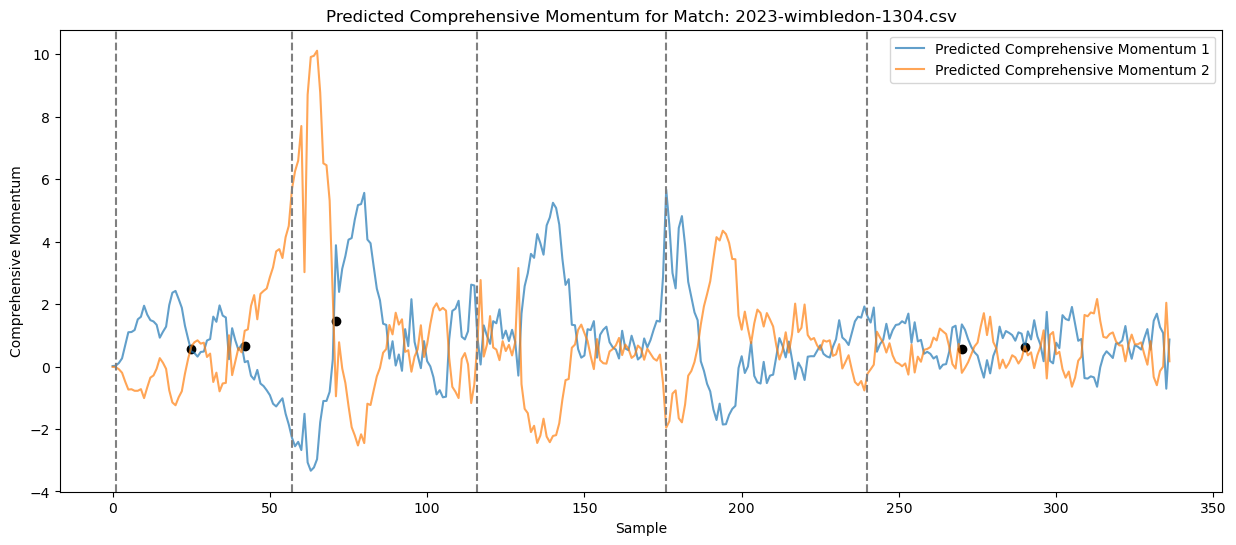

Match: 2023-wimbledon-1305.csv
Intersection 1: (x=0, y=0.01) - Change in Momentum 1: -0.69, Change in Momentum 2: -0.85
Match: 2023-wimbledon-1305.csv
Intersection 2: (x=20, y=0.53) - Change in Momentum 1: -1.26, Change in Momentum 2: 1.44
Match: 2023-wimbledon-1305.csv
Intersection 3: (x=53, y=0.69) - Change in Momentum 1: 0.78, Change in Momentum 2: -0.93
Match: 2023-wimbledon-1305.csv
Intersection 4: (x=83, y=0.62) - Change in Momentum 1: 2.16, Change in Momentum 2: -2.05
Match: 2023-wimbledon-1305.csv
Intersection 5: (x=118, y=1.13) - Change in Momentum 1: -0.38, Change in Momentum 2: 1.31
Match: 2023-wimbledon-1305.csv
Intersection 6: (x=126, y=1.16) - Change in Momentum 1: 3.86, Change in Momentum 2: -4.53
Match: 2023-wimbledon-1305.csv
Intersection 7: (x=148, y=0.74) - Change in Momentum 1: -0.33, Change in Momentum 2: 0.33
Match: 2023-wimbledon-1305.csv
Intersection 8: (x=163, y=0.68) - Change in Momentum 1: 0.45, Change in Momentum 2: -0.38
Match: 2023-wimbledon-1305.csv
Inter

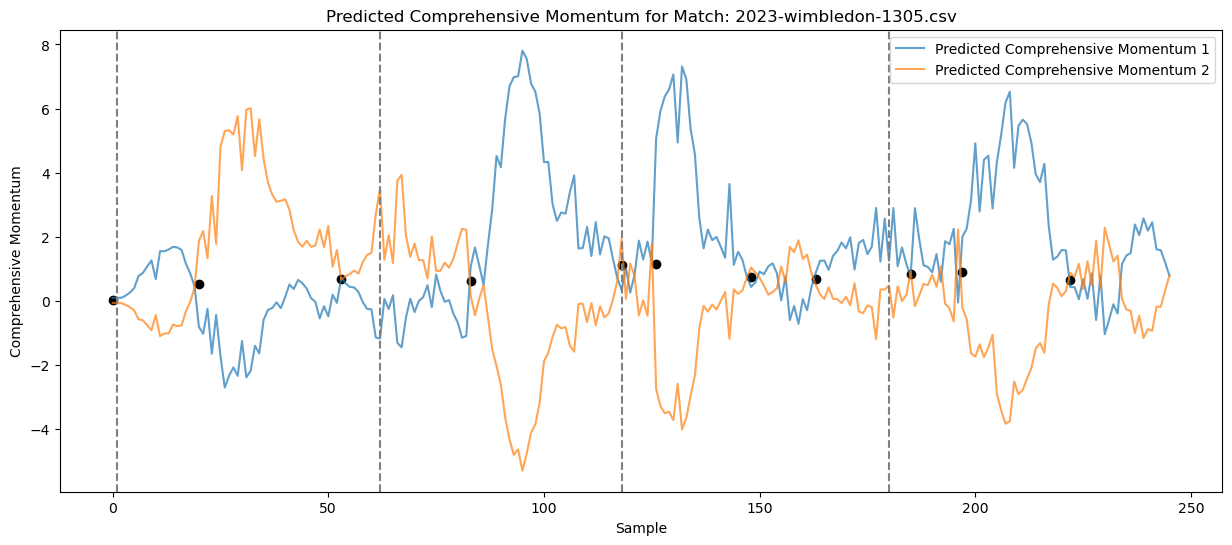

Match: 2023-wimbledon-1306.csv
Intersection 1: (x=0, y=0.0) - Change in Momentum 1: -6.76, Change in Momentum 2: 3.64
Match: 2023-wimbledon-1306.csv
Intersection 2: (x=16, y=0.44) - Change in Momentum 1: 0.66, Change in Momentum 2: -0.71
Match: 2023-wimbledon-1306.csv
Intersection 3: (x=61, y=0.59) - Change in Momentum 1: -0.91, Change in Momentum 2: 0.71
Match: 2023-wimbledon-1306.csv
Intersection 4: (x=110, y=0.69) - Change in Momentum 1: 0.74, Change in Momentum 2: -0.70
Match: 2023-wimbledon-1306.csv
Intersection 5: (x=132, y=0.83) - Change in Momentum 1: -2.34, Change in Momentum 2: 1.26
Match: 2023-wimbledon-1306.csv
Intersection 6: (x=142, y=0.5) - Change in Momentum 1: 0.55, Change in Momentum 2: -0.62
Match: 2023-wimbledon-1306.csv
Intersection 7: (x=164, y=0.85) - Change in Momentum 1: -0.17, Change in Momentum 2: 0.57
Match: 2023-wimbledon-1306.csv
Intersection 8: (x=319, y=0.57) - Change in Momentum 1: 1.66, Change in Momentum 2: -2.07


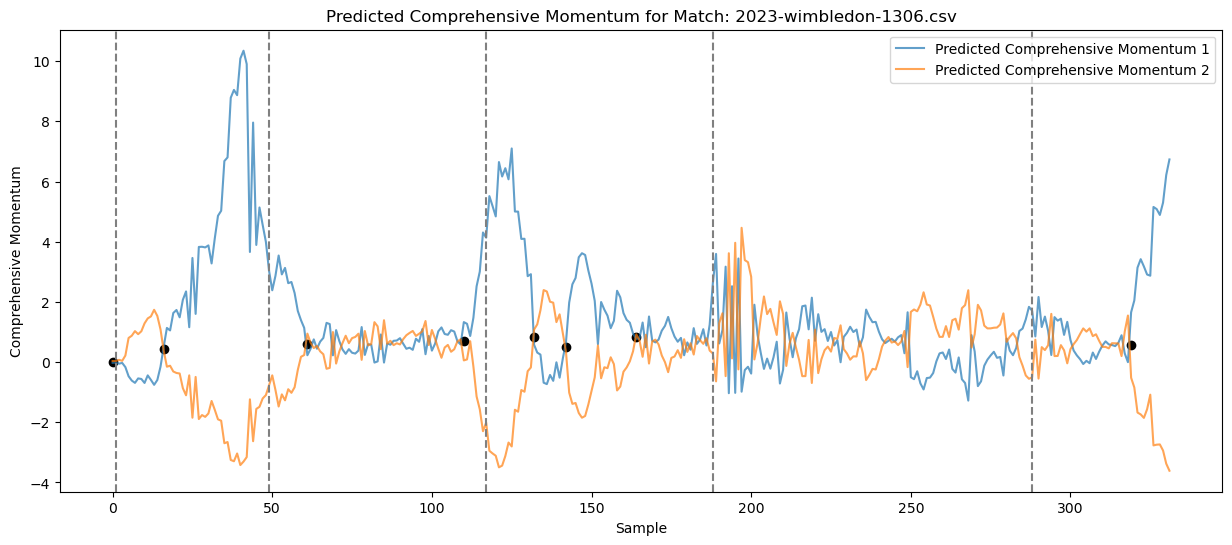

Match: 2023-wimbledon-1307.csv
Intersection 1: (x=17, y=0.48) - Change in Momentum 1: -0.58, Change in Momentum 2: 0.51
Match: 2023-wimbledon-1307.csv
Intersection 2: (x=144, y=0.69) - Change in Momentum 1: 0.74, Change in Momentum 2: -0.38
Match: 2023-wimbledon-1307.csv
Intersection 3: (x=178, y=0.75) - Change in Momentum 1: -0.94, Change in Momentum 2: 1.26
Match: 2023-wimbledon-1307.csv
Intersection 4: (x=183, y=0.62) - Change in Momentum 1: 0.81, Change in Momentum 2: -0.83
Match: 2023-wimbledon-1307.csv
Intersection 5: (x=205, y=0.62) - Change in Momentum 1: -1.33, Change in Momentum 2: 0.98
Match: 2023-wimbledon-1307.csv
Intersection 6: (x=220, y=0.6) - Change in Momentum 1: 0.47, Change in Momentum 2: -0.35


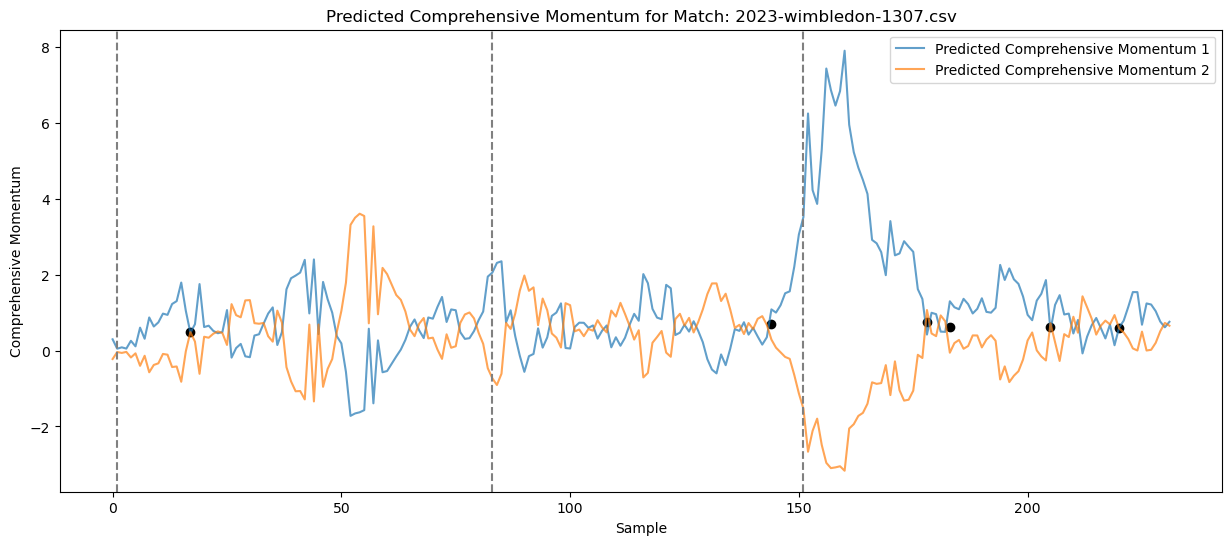

Match: 2023-wimbledon-1308.csv
Intersection 1: (x=0, y=0.01) - Change in Momentum 1: -0.92, Change in Momentum 2: -0.28
Match: 2023-wimbledon-1308.csv
Intersection 2: (x=19, y=0.47) - Change in Momentum 1: -0.75, Change in Momentum 2: 0.54
Match: 2023-wimbledon-1308.csv
Intersection 3: (x=48, y=0.74) - Change in Momentum 1: -0.58, Change in Momentum 2: 0.73
Match: 2023-wimbledon-1308.csv
Intersection 4: (x=75, y=0.86) - Change in Momentum 1: 1.15, Change in Momentum 2: -1.11
Match: 2023-wimbledon-1308.csv
Intersection 5: (x=100, y=0.61) - Change in Momentum 1: -0.95, Change in Momentum 2: 0.59


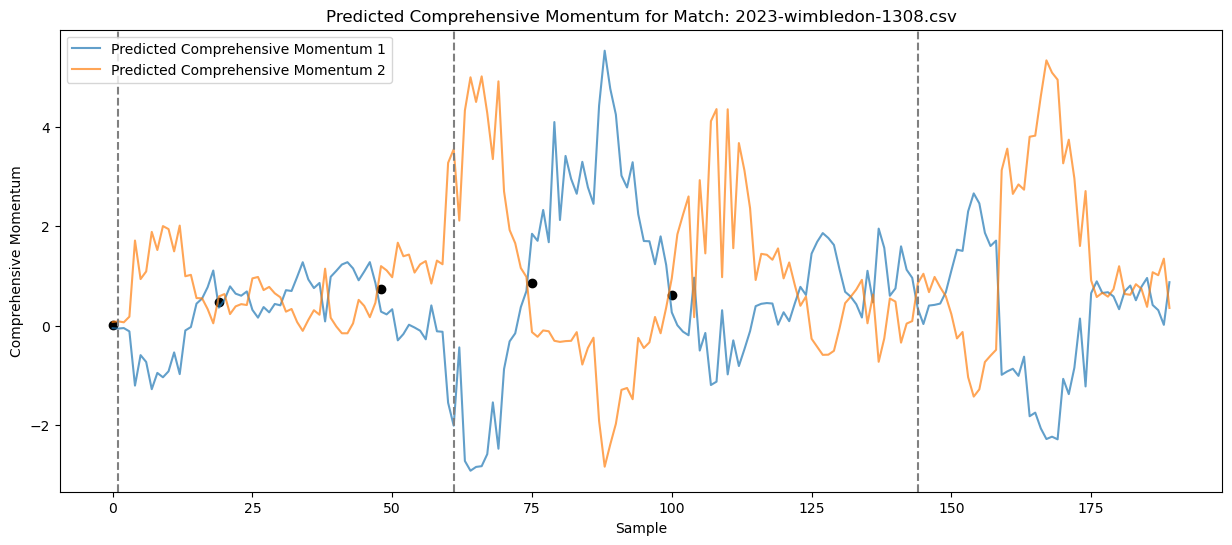

Match: 2023-wimbledon-1309.csv
Intersection 1: (x=0, y=0.0) - Change in Momentum 1: -3.51, Change in Momentum 2: 1.92
Match: 2023-wimbledon-1309.csv
Intersection 2: (x=6, y=0.17) - Change in Momentum 1: -0.49, Change in Momentum 2: 0.81
Match: 2023-wimbledon-1309.csv
Intersection 3: (x=28, y=0.77) - Change in Momentum 1: -0.71, Change in Momentum 2: 0.70
Match: 2023-wimbledon-1309.csv
Intersection 4: (x=67, y=0.57) - Change in Momentum 1: 0.65, Change in Momentum 2: -0.74
Match: 2023-wimbledon-1309.csv
Intersection 5: (x=108, y=0.68) - Change in Momentum 1: -2.25, Change in Momentum 2: 1.23
Match: 2023-wimbledon-1309.csv
Intersection 6: (x=127, y=0.71) - Change in Momentum 1: 0.75, Change in Momentum 2: -0.63
Match: 2023-wimbledon-1309.csv
Intersection 7: (x=162, y=0.91) - Change in Momentum 1: -3.06, Change in Momentum 2: 1.56
Match: 2023-wimbledon-1309.csv
Intersection 8: (x=193, y=1.0) - Change in Momentum 1: 1.26, Change in Momentum 2: -0.64


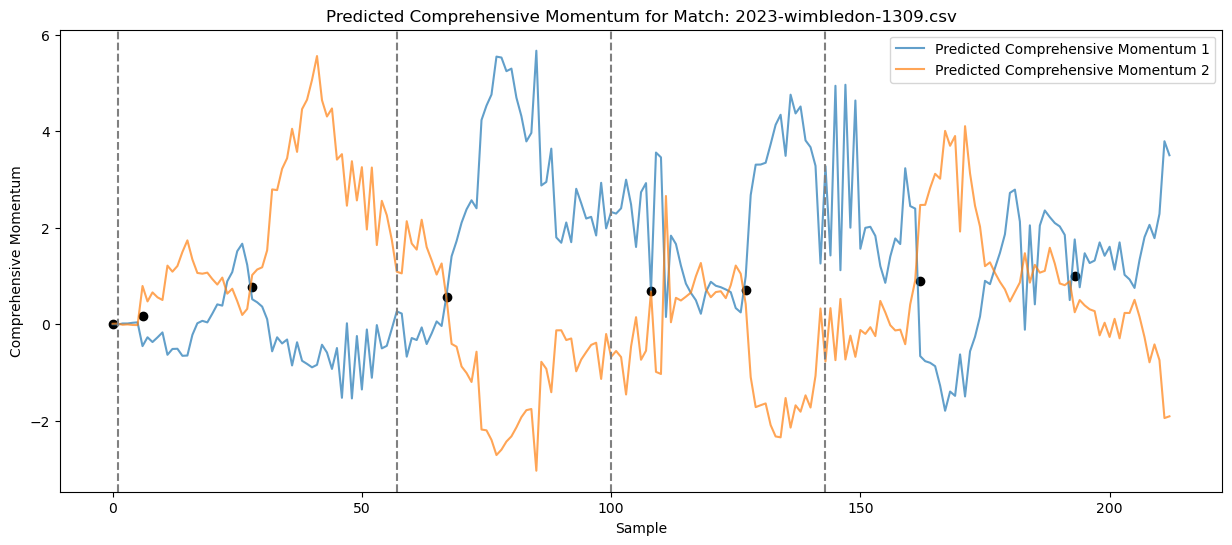

Match: 2023-wimbledon-1312.csv
Intersection 1: (x=0, y=0.0) - Change in Momentum 1: -2.57, Change in Momentum 2: 1.03
Match: 2023-wimbledon-1312.csv
Intersection 2: (x=6, y=0.05) - Change in Momentum 1: 0.34, Change in Momentum 2: -0.29
Match: 2023-wimbledon-1312.csv
Intersection 3: (x=20, y=0.34) - Change in Momentum 1: 0.88, Change in Momentum 2: -1.19
Match: 2023-wimbledon-1312.csv
Intersection 4: (x=45, y=0.58) - Change in Momentum 1: -0.81, Change in Momentum 2: 0.47
Match: 2023-wimbledon-1312.csv
Intersection 5: (x=71, y=0.6) - Change in Momentum 1: 0.40, Change in Momentum 2: -0.43
Match: 2023-wimbledon-1312.csv
Intersection 6: (x=72, y=0.65) - Change in Momentum 1: -0.42, Change in Momentum 2: 0.52
Match: 2023-wimbledon-1312.csv
Intersection 7: (x=100, y=0.88) - Change in Momentum 1: 1.15, Change in Momentum 2: -1.94
Match: 2023-wimbledon-1312.csv
Intersection 8: (x=122, y=0.69) - Change in Momentum 1: -1.04, Change in Momentum 2: 0.60
Match: 2023-wimbledon-1312.csv
Intersectio

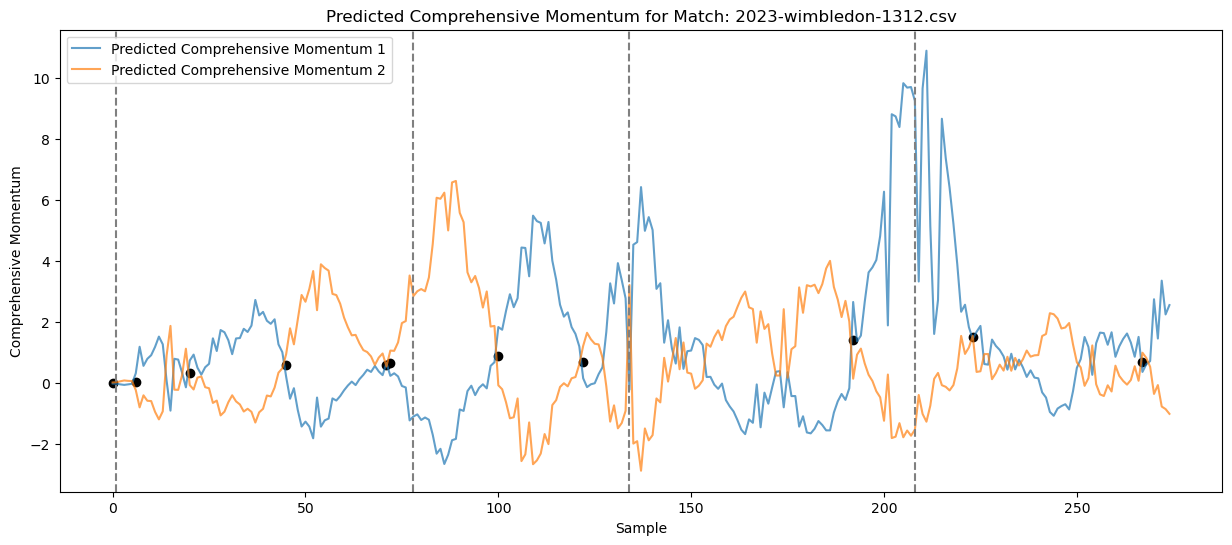

Match: 2023-wimbledon-1313.csv
Intersection 1: (x=29, y=0.95) - Change in Momentum 1: -0.59, Change in Momentum 2: 0.71
Match: 2023-wimbledon-1313.csv
Intersection 2: (x=41, y=0.74) - Change in Momentum 1: 1.05, Change in Momentum 2: -1.01
Match: 2023-wimbledon-1313.csv
Intersection 3: (x=67, y=0.7) - Change in Momentum 1: -0.47, Change in Momentum 2: 0.55
Match: 2023-wimbledon-1313.csv
Intersection 4: (x=110, y=0.85) - Change in Momentum 1: 0.85, Change in Momentum 2: -0.33
Match: 2023-wimbledon-1313.csv
Intersection 5: (x=146, y=0.8) - Change in Momentum 1: -0.57, Change in Momentum 2: 0.85
Match: 2023-wimbledon-1313.csv
Intersection 6: (x=203, y=0.97) - Change in Momentum 1: 2.67, Change in Momentum 2: -1.98
Match: 2023-wimbledon-1313.csv
Intersection 7: (x=233, y=0.69) - Change in Momentum 1: -0.70, Change in Momentum 2: 0.93
Match: 2023-wimbledon-1313.csv
Intersection 8: (x=239, y=0.78) - Change in Momentum 1: 1.02, Change in Momentum 2: -0.93


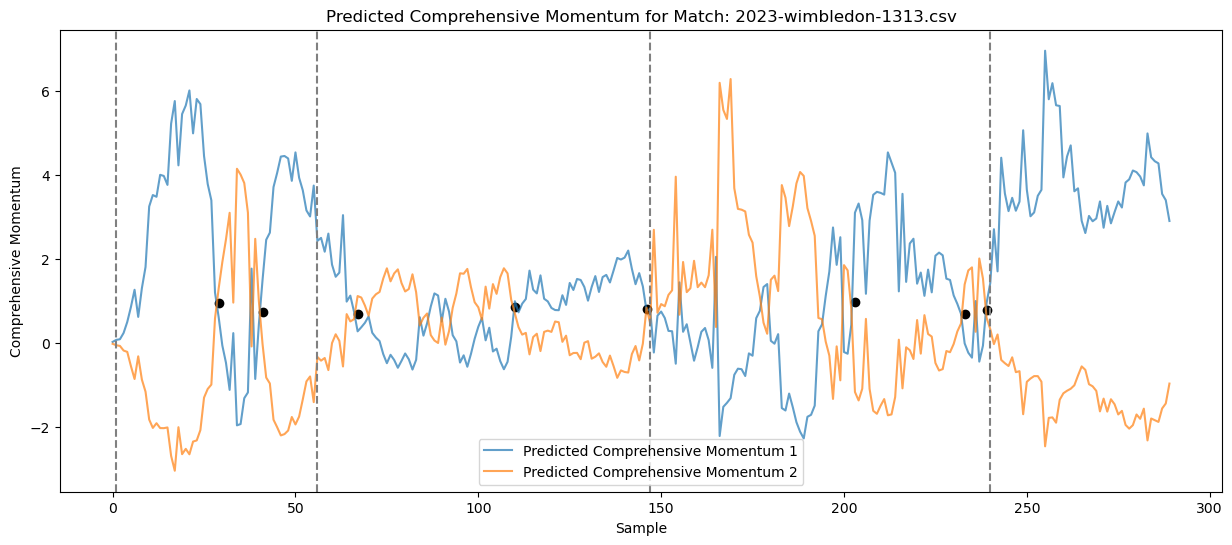

Match: 2023-wimbledon-1314.csv
Intersection 1: (x=0, y=0.02) - Change in Momentum 1: -0.97, Change in Momentum 2: -0.39
Match: 2023-wimbledon-1314.csv
Intersection 2: (x=16, y=0.61) - Change in Momentum 1: 1.93, Change in Momentum 2: -1.67
Match: 2023-wimbledon-1314.csv
Intersection 3: (x=61, y=0.62) - Change in Momentum 1: 0.54, Change in Momentum 2: -0.45
Match: 2023-wimbledon-1314.csv
Intersection 4: (x=143, y=0.7) - Change in Momentum 1: -1.34, Change in Momentum 2: 1.62
Match: 2023-wimbledon-1314.csv
Intersection 5: (x=149, y=0.63) - Change in Momentum 1: 0.52, Change in Momentum 2: -0.41
Match: 2023-wimbledon-1314.csv
Intersection 6: (x=181, y=0.76) - Change in Momentum 1: -0.94, Change in Momentum 2: 1.16


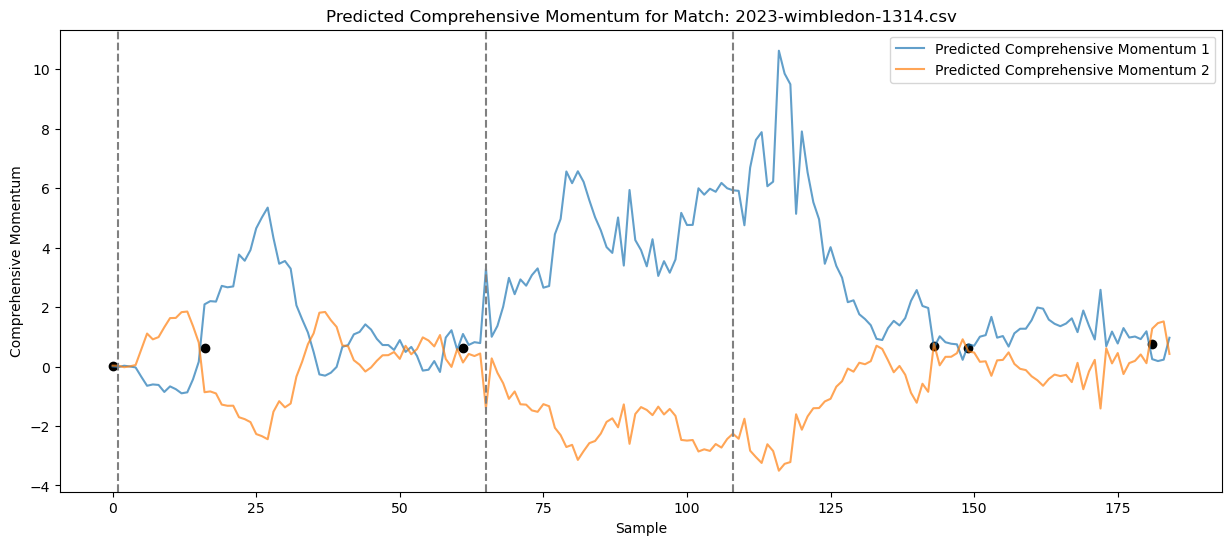

Match: 2023-wimbledon-1315.csv
Intersection 1: (x=24, y=0.54) - Change in Momentum 1: 0.54, Change in Momentum 2: -0.56
Match: 2023-wimbledon-1315.csv
Intersection 2: (x=97, y=0.55) - Change in Momentum 1: -0.71, Change in Momentum 2: 0.45
Match: 2023-wimbledon-1315.csv
Intersection 3: (x=122, y=0.64) - Change in Momentum 1: 1.98, Change in Momentum 2: -2.25
Match: 2023-wimbledon-1315.csv
Intersection 4: (x=139, y=0.43) - Change in Momentum 1: -0.65, Change in Momentum 2: 0.67
Match: 2023-wimbledon-1315.csv
Intersection 5: (x=184, y=0.68) - Change in Momentum 1: 0.79, Change in Momentum 2: -0.67


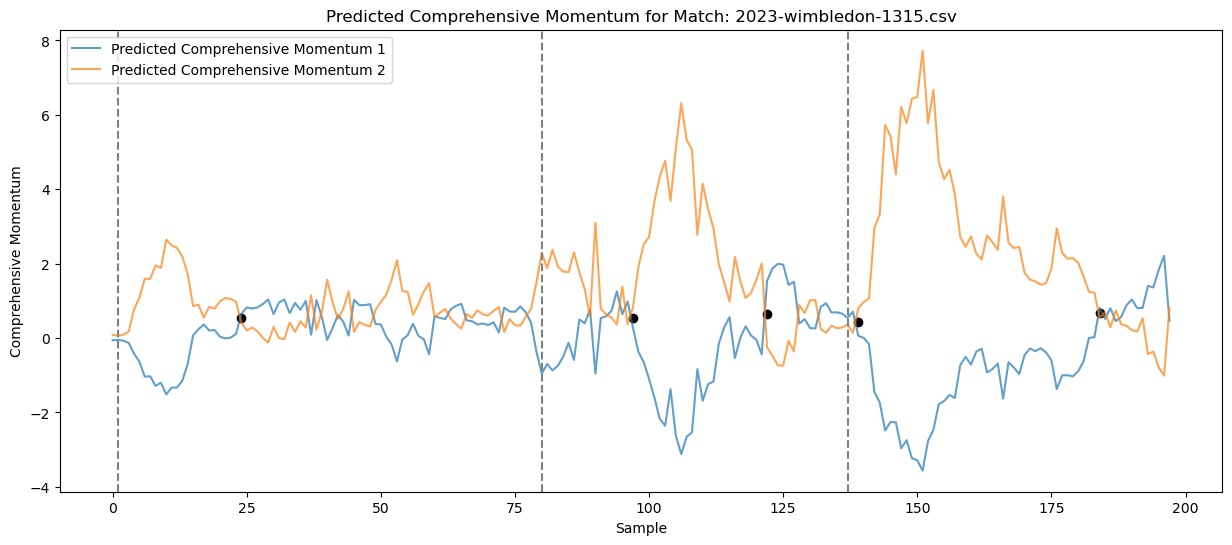

Match: 2023-wimbledon-1316.csv
Intersection 1: (x=0, y=0.01) - Change in Momentum 1: -1.35, Change in Momentum 2: -0.15
Match: 2023-wimbledon-1316.csv
Intersection 2: (x=19, y=0.57) - Change in Momentum 1: 0.57, Change in Momentum 2: -0.54
Match: 2023-wimbledon-1316.csv
Intersection 3: (x=110, y=0.79) - Change in Momentum 1: 0.55, Change in Momentum 2: -0.61
Match: 2023-wimbledon-1316.csv
Intersection 4: (x=161, y=0.68) - Change in Momentum 1: 0.68, Change in Momentum 2: -0.47


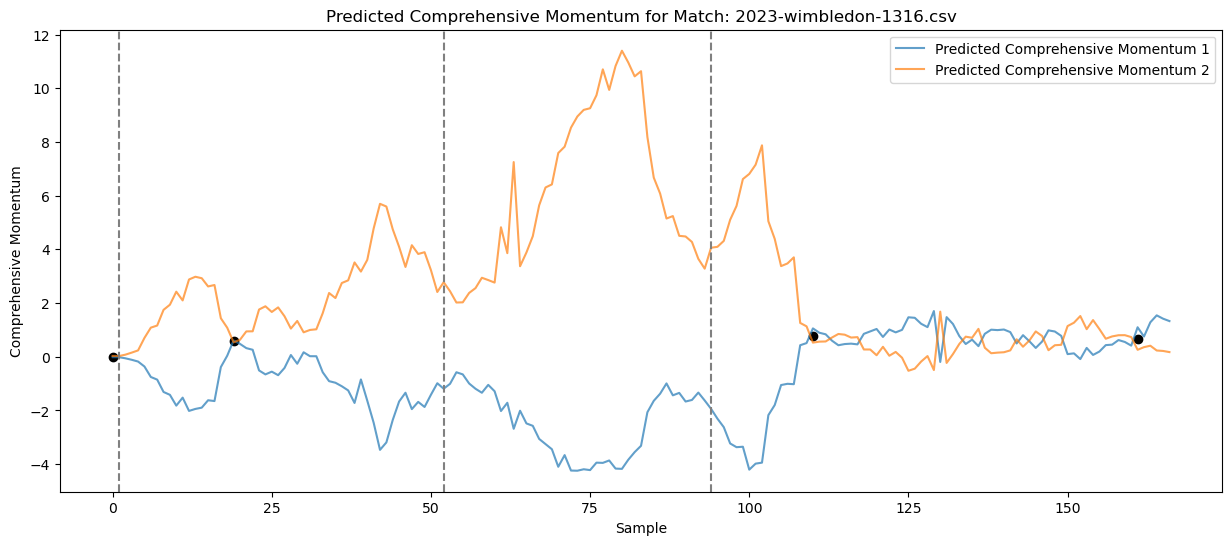

Match: 2023-wimbledon-1401.csv
Intersection 1: (x=0, y=0.02) - Change in Momentum 1: -4.80, Change in Momentum 2: 2.74
Match: 2023-wimbledon-1401.csv
Intersection 2: (x=7, y=0.03) - Change in Momentum 1: -0.39, Change in Momentum 2: 0.47
Match: 2023-wimbledon-1401.csv
Intersection 3: (x=48, y=0.55) - Change in Momentum 1: -0.49, Change in Momentum 2: 0.60
Match: 2023-wimbledon-1401.csv
Intersection 4: (x=79, y=1.34) - Change in Momentum 1: 1.65, Change in Momentum 2: -0.07
Match: 2023-wimbledon-1401.csv
Intersection 5: (x=84, y=0.61) - Change in Momentum 1: 0.20, Change in Momentum 2: -0.78
Match: 2023-wimbledon-1401.csv
Intersection 6: (x=110, y=0.82) - Change in Momentum 1: -0.74, Change in Momentum 2: 0.95
Match: 2023-wimbledon-1401.csv
Intersection 7: (x=124, y=0.71) - Change in Momentum 1: 0.84, Change in Momentum 2: -0.64
Match: 2023-wimbledon-1401.csv
Intersection 8: (x=157, y=0.8) - Change in Momentum 1: -2.64, Change in Momentum 2: 1.93
Match: 2023-wimbledon-1401.csv
Intersect

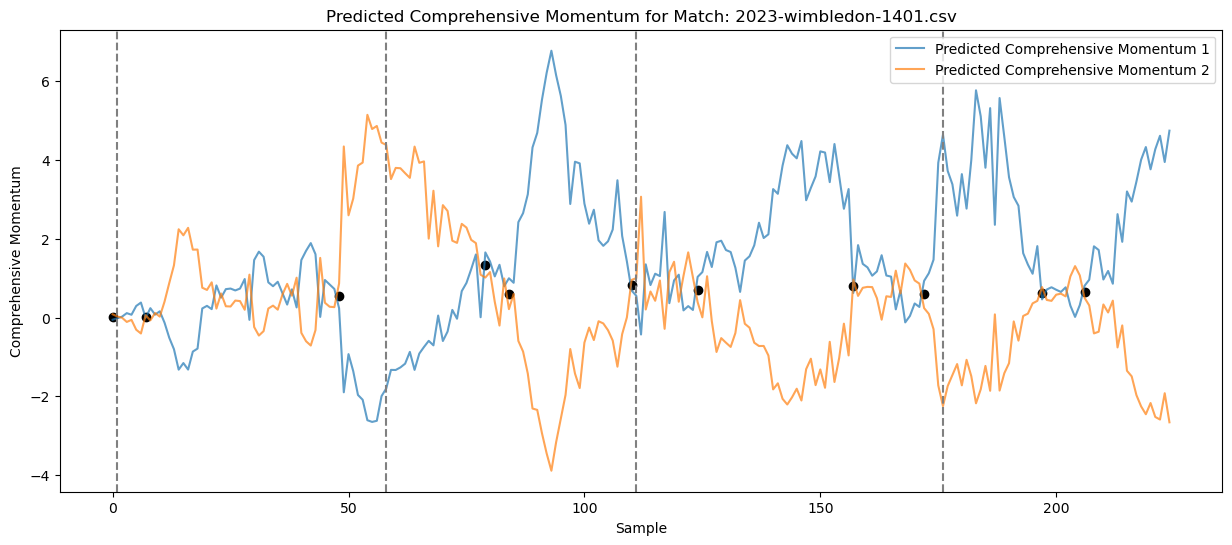

Match: 2023-wimbledon-1402.csv
Intersection 1: (x=0, y=0.02) - Change in Momentum 1: -0.01, Change in Momentum 2: -1.84
Match: 2023-wimbledon-1402.csv
Intersection 2: (x=16, y=0.4) - Change in Momentum 1: 0.59, Change in Momentum 2: -0.26
Match: 2023-wimbledon-1402.csv
Intersection 3: (x=36, y=0.48) - Change in Momentum 1: -0.37, Change in Momentum 2: 0.33
Match: 2023-wimbledon-1402.csv
Intersection 4: (x=83, y=0.84) - Change in Momentum 1: -0.64, Change in Momentum 2: 0.46
Match: 2023-wimbledon-1402.csv
Intersection 5: (x=86, y=0.61) - Change in Momentum 1: 0.79, Change in Momentum 2: -1.16
Match: 2023-wimbledon-1402.csv
Intersection 6: (x=116, y=0.73) - Change in Momentum 1: -1.03, Change in Momentum 2: 1.02
Match: 2023-wimbledon-1402.csv
Intersection 7: (x=184, y=0.61) - Change in Momentum 1: 0.43, Change in Momentum 2: -0.59
Match: 2023-wimbledon-1402.csv
Intersection 8: (x=216, y=0.72) - Change in Momentum 1: -0.92, Change in Momentum 2: 1.15
Match: 2023-wimbledon-1402.csv
Interse

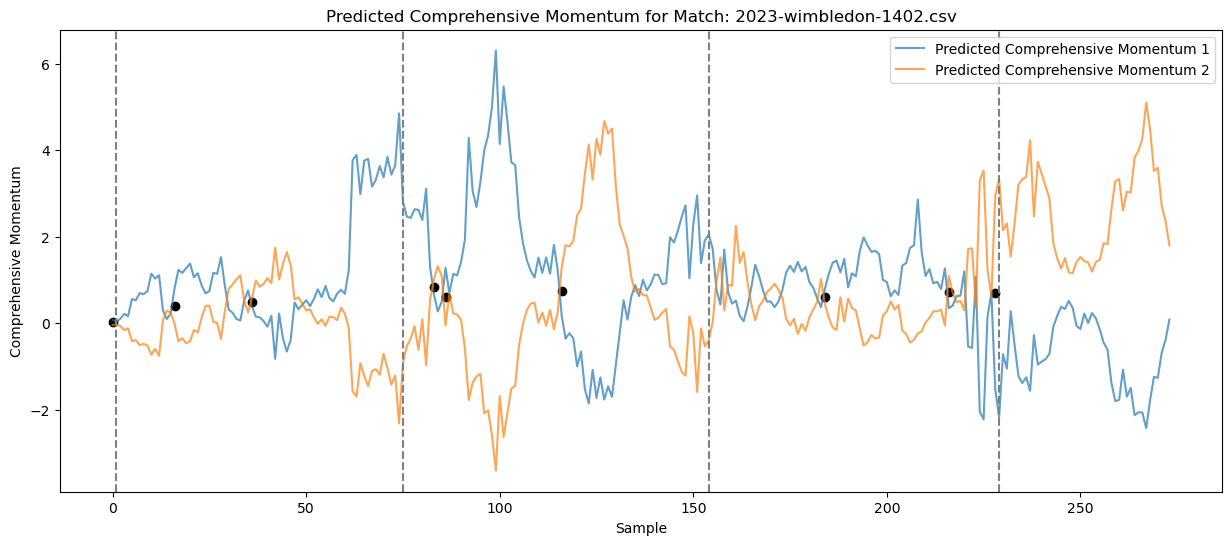

Match: 2023-wimbledon-1403.csv
Intersection 1: (x=0, y=0.02) - Change in Momentum 1: -3.49, Change in Momentum 2: 1.90
Match: 2023-wimbledon-1403.csv
Intersection 2: (x=8, y=0.06) - Change in Momentum 1: 0.28, Change in Momentum 2: -0.22
Match: 2023-wimbledon-1403.csv
Intersection 3: (x=40, y=0.74) - Change in Momentum 1: -2.46, Change in Momentum 2: 1.70
Match: 2023-wimbledon-1403.csv
Intersection 4: (x=61, y=0.59) - Change in Momentum 1: 0.41, Change in Momentum 2: -0.17


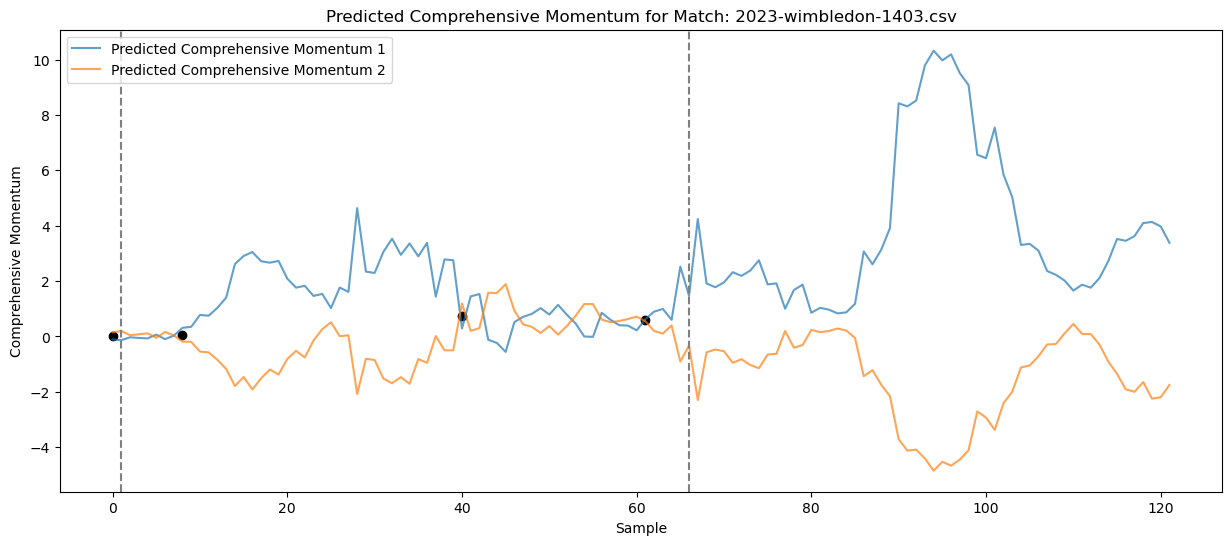

Match: 2023-wimbledon-1404.csv
Intersection 1: (x=15, y=0.49) - Change in Momentum 1: -1.42, Change in Momentum 2: 1.52
Match: 2023-wimbledon-1404.csv
Intersection 2: (x=41, y=0.59) - Change in Momentum 1: 0.40, Change in Momentum 2: -0.71
Match: 2023-wimbledon-1404.csv
Intersection 3: (x=42, y=0.61) - Change in Momentum 1: -0.44, Change in Momentum 2: 0.48
Match: 2023-wimbledon-1404.csv
Intersection 4: (x=74, y=0.57) - Change in Momentum 1: 0.31, Change in Momentum 2: -0.32
Match: 2023-wimbledon-1404.csv
Intersection 5: (x=78, y=0.61) - Change in Momentum 1: -0.23, Change in Momentum 2: 0.29
Match: 2023-wimbledon-1404.csv
Intersection 6: (x=101, y=0.67) - Change in Momentum 1: 0.39, Change in Momentum 2: -0.12
Match: 2023-wimbledon-1404.csv
Intersection 7: (x=144, y=0.64) - Change in Momentum 1: -1.16, Change in Momentum 2: 1.03
Match: 2023-wimbledon-1404.csv
Intersection 8: (x=197, y=0.51) - Change in Momentum 1: 0.23, Change in Momentum 2: -0.30
Match: 2023-wimbledon-1404.csv
Inters

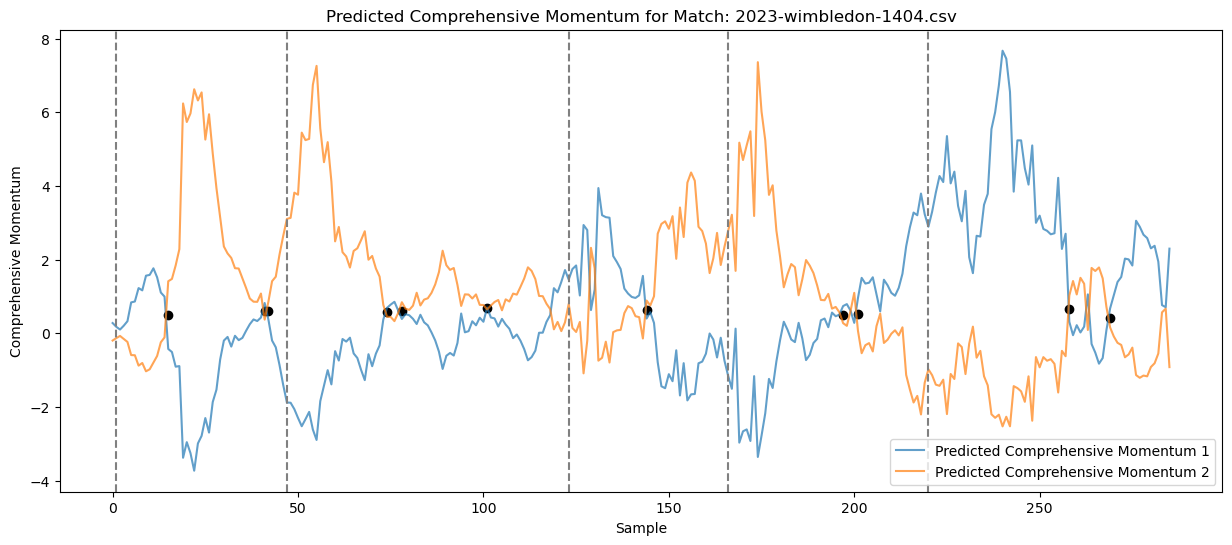

Match: 2023-wimbledon-1405.csv
Intersection 1: (x=0, y=0.01) - Change in Momentum 1: -1.97, Change in Momentum 2: 0.66
Match: 2023-wimbledon-1405.csv
Intersection 2: (x=17, y=0.4) - Change in Momentum 1: 0.69, Change in Momentum 2: -0.69
Match: 2023-wimbledon-1405.csv
Intersection 3: (x=151, y=0.62) - Change in Momentum 1: 1.13, Change in Momentum 2: -1.52


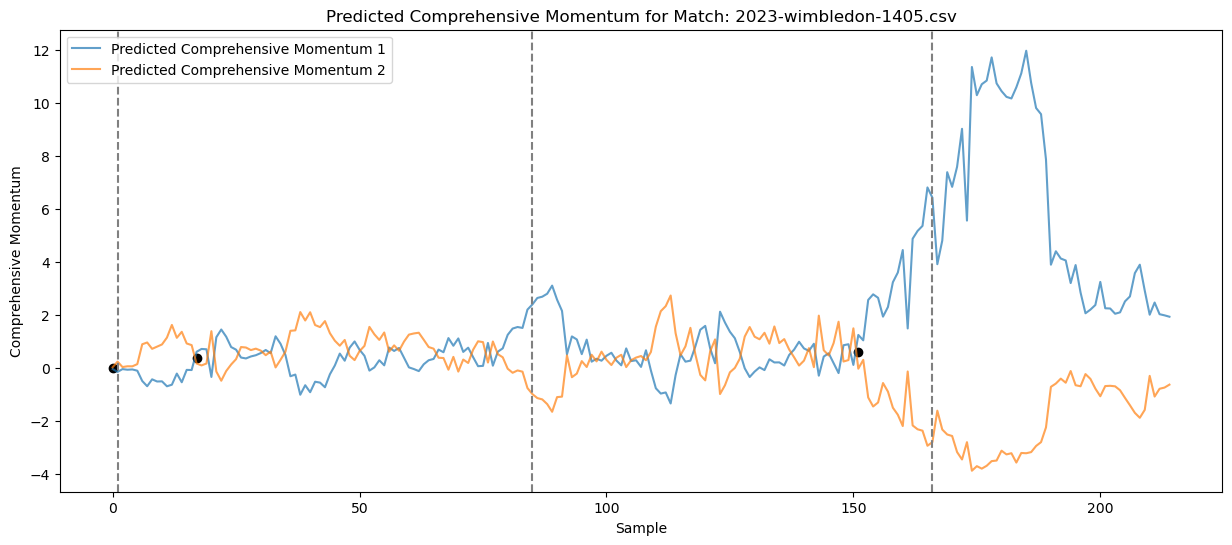

Match: 2023-wimbledon-1406.csv
Intersection 1: (x=0, y=0.01) - Change in Momentum 1: -3.53, Change in Momentum 2: 1.43
Match: 2023-wimbledon-1406.csv
Intersection 2: (x=28, y=0.51) - Change in Momentum 1: 0.54, Change in Momentum 2: -0.42
Match: 2023-wimbledon-1406.csv
Intersection 3: (x=32, y=0.47) - Change in Momentum 1: -0.34, Change in Momentum 2: 0.30
Match: 2023-wimbledon-1406.csv
Intersection 4: (x=63, y=0.63) - Change in Momentum 1: 0.73, Change in Momentum 2: -0.59
Match: 2023-wimbledon-1406.csv
Intersection 5: (x=116, y=0.78) - Change in Momentum 1: 0.42, Change in Momentum 2: -1.46
Match: 2023-wimbledon-1406.csv
Intersection 6: (x=171, y=0.63) - Change in Momentum 1: -1.51, Change in Momentum 2: 1.12
Match: 2023-wimbledon-1406.csv
Intersection 7: (x=179, y=0.52) - Change in Momentum 1: 0.67, Change in Momentum 2: -0.71


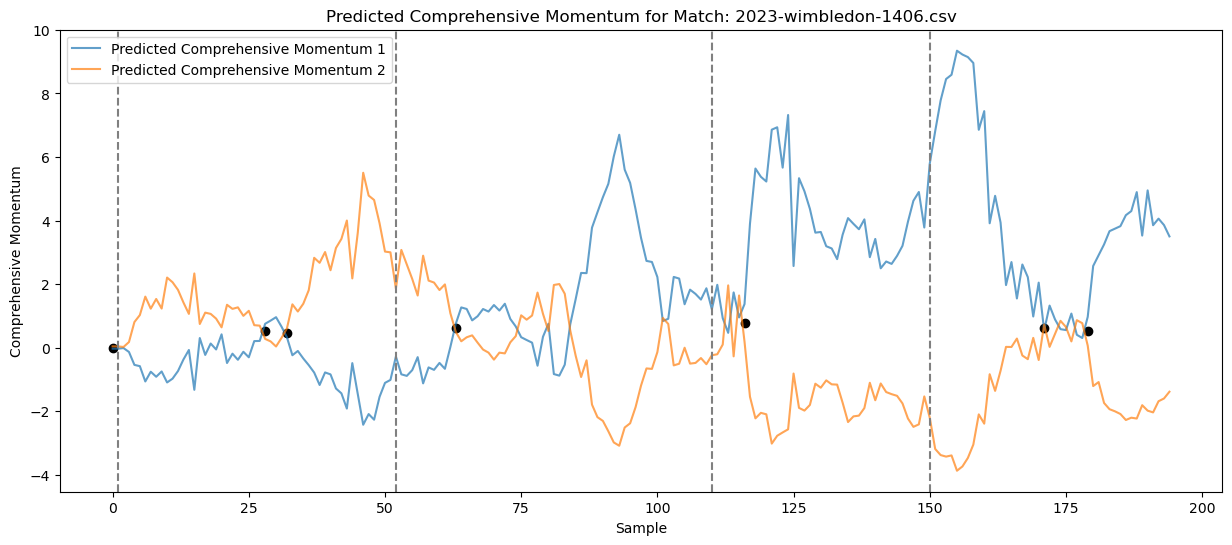

Match: 2023-wimbledon-1407.csv
Intersection 1: (x=32, y=0.5) - Change in Momentum 1: -0.49, Change in Momentum 2: 0.24
Match: 2023-wimbledon-1407.csv
Intersection 2: (x=72, y=0.6) - Change in Momentum 1: 1.64, Change in Momentum 2: -1.67
Match: 2023-wimbledon-1407.csv
Intersection 3: (x=103, y=0.61) - Change in Momentum 1: -0.47, Change in Momentum 2: 0.57
Match: 2023-wimbledon-1407.csv
Intersection 4: (x=133, y=0.71) - Change in Momentum 1: -1.21, Change in Momentum 2: 0.68
Match: 2023-wimbledon-1407.csv
Intersection 5: (x=205, y=0.66) - Change in Momentum 1: 0.30, Change in Momentum 2: -0.22
Match: 2023-wimbledon-1407.csv
Intersection 6: (x=227, y=0.67) - Change in Momentum 1: -1.28, Change in Momentum 2: 0.54
Match: 2023-wimbledon-1407.csv
Intersection 7: (x=283, y=0.91) - Change in Momentum 1: -0.59, Change in Momentum 2: 0.54
Match: 2023-wimbledon-1407.csv
Intersection 8: (x=305, y=0.69) - Change in Momentum 1: -0.45, Change in Momentum 2: 0.45
Match: 2023-wimbledon-1407.csv
Inter

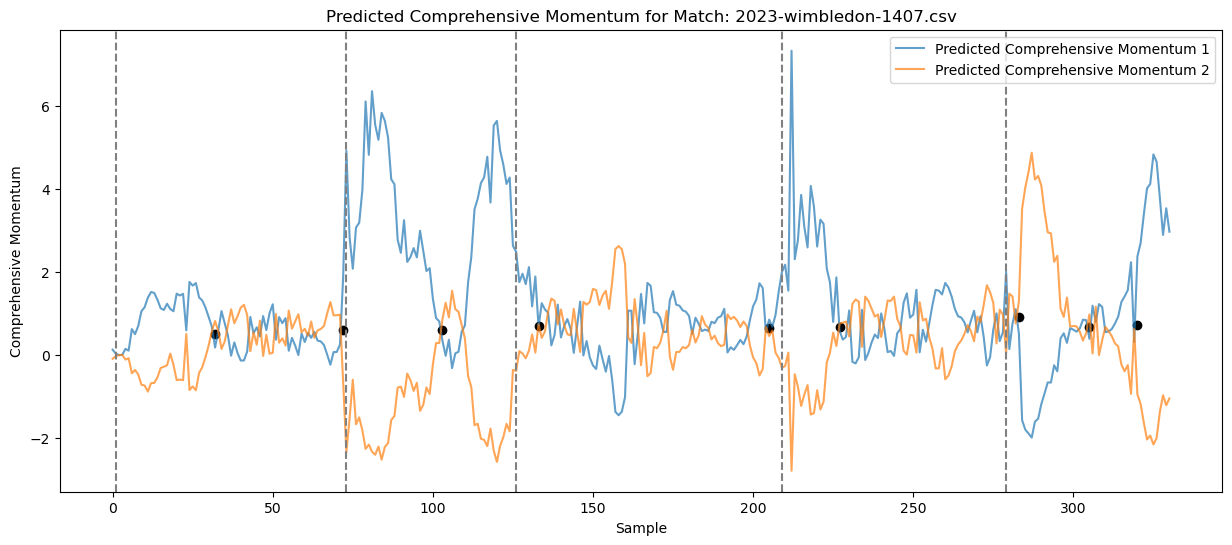

Match: 2023-wimbledon-1408.csv
Intersection 1: (x=16, y=0.52) - Change in Momentum 1: -1.66, Change in Momentum 2: 1.64
Match: 2023-wimbledon-1408.csv
Intersection 2: (x=71, y=0.72) - Change in Momentum 1: -0.59, Change in Momentum 2: 0.91
Match: 2023-wimbledon-1408.csv
Intersection 3: (x=103, y=0.55) - Change in Momentum 1: 1.38, Change in Momentum 2: -1.65
Match: 2023-wimbledon-1408.csv
Intersection 4: (x=108, y=0.65) - Change in Momentum 1: -0.31, Change in Momentum 2: 0.47
Match: 2023-wimbledon-1408.csv
Intersection 5: (x=134, y=0.69) - Change in Momentum 1: -0.47, Change in Momentum 2: 0.54
Match: 2023-wimbledon-1408.csv
Intersection 6: (x=159, y=0.46) - Change in Momentum 1: 1.28, Change in Momentum 2: -1.52
Match: 2023-wimbledon-1408.csv
Intersection 7: (x=181, y=0.5) - Change in Momentum 1: -0.54, Change in Momentum 2: 0.51
Match: 2023-wimbledon-1408.csv
Intersection 8: (x=198, y=0.57) - Change in Momentum 1: 0.40, Change in Momentum 2: -0.46
Match: 2023-wimbledon-1408.csv
Inte

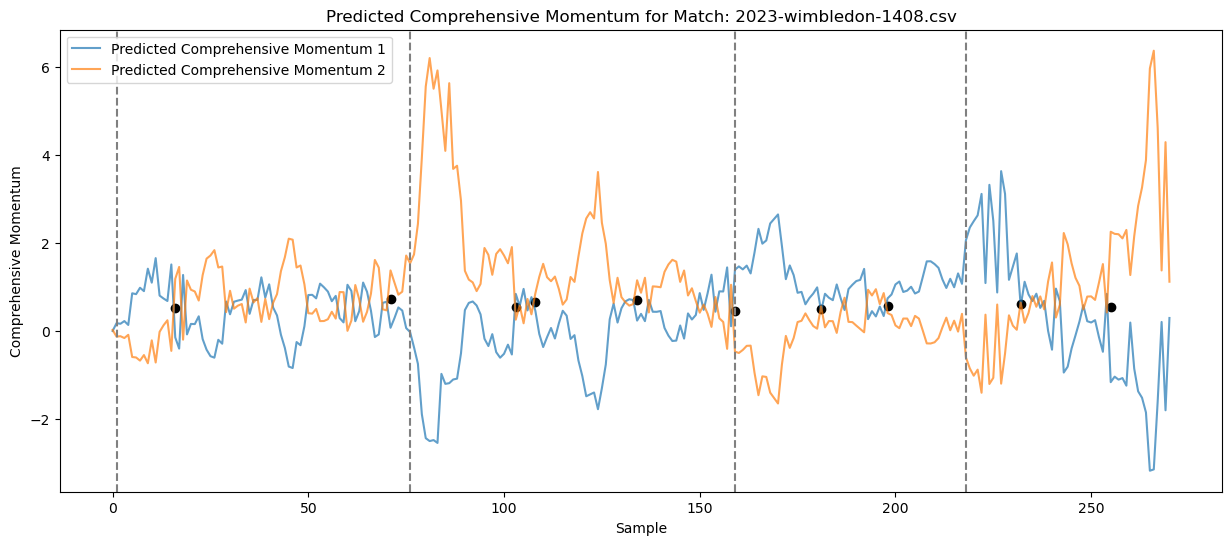

Match: 2023-wimbledon-1501.csv
Intersection 1: (x=20, y=0.49) - Change in Momentum 1: -0.37, Change in Momentum 2: 0.38
Match: 2023-wimbledon-1501.csv
Intersection 2: (x=128, y=0.69) - Change in Momentum 1: 0.31, Change in Momentum 2: -0.50


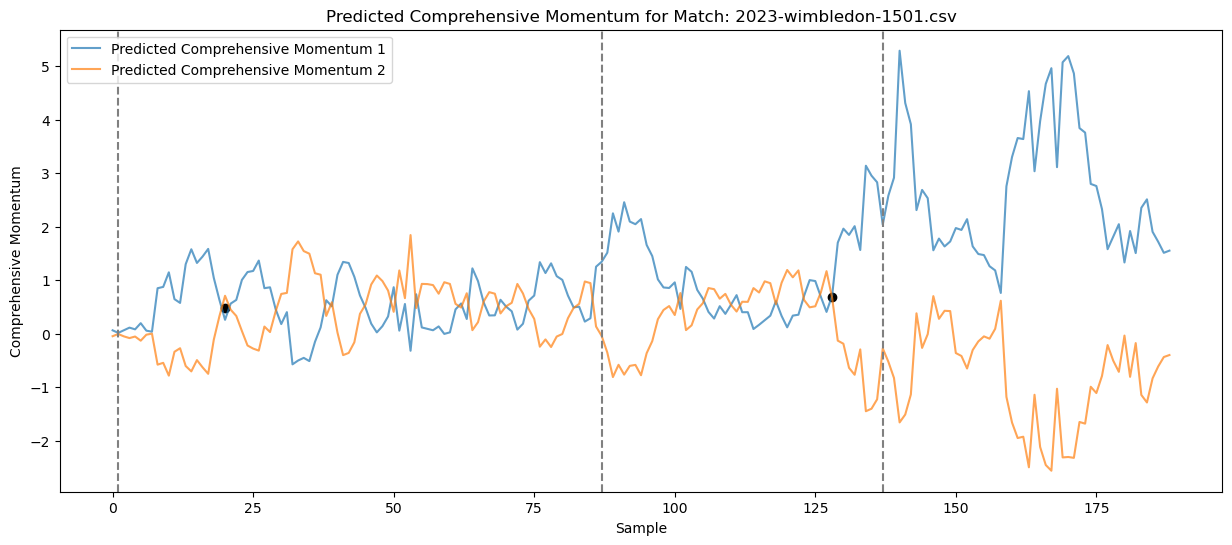

Match: 2023-wimbledon-1502.csv
Intersection 1: (x=0, y=0.0) - Change in Momentum 1: -2.63, Change in Momentum 2: 0.87
Match: 2023-wimbledon-1502.csv
Intersection 2: (x=14, y=0.49) - Change in Momentum 1: 0.28, Change in Momentum 2: -0.28
Match: 2023-wimbledon-1502.csv
Intersection 3: (x=38, y=0.77) - Change in Momentum 1: -0.31, Change in Momentum 2: 0.34
Match: 2023-wimbledon-1502.csv
Intersection 4: (x=83, y=0.71) - Change in Momentum 1: -1.83, Change in Momentum 2: 2.00
Match: 2023-wimbledon-1502.csv
Intersection 5: (x=109, y=1.3) - Change in Momentum 1: 3.51, Change in Momentum 2: -5.32
Match: 2023-wimbledon-1502.csv
Intersection 6: (x=110, y=1.3) - Change in Momentum 1: -1.44, Change in Momentum 2: 1.44
Match: 2023-wimbledon-1502.csv
Intersection 7: (x=153, y=0.65) - Change in Momentum 1: 0.82, Change in Momentum 2: -0.60
Match: 2023-wimbledon-1502.csv
Intersection 8: (x=157, y=0.59) - Change in Momentum 1: 0.38, Change in Momentum 2: -0.26
Match: 2023-wimbledon-1502.csv
Intersect

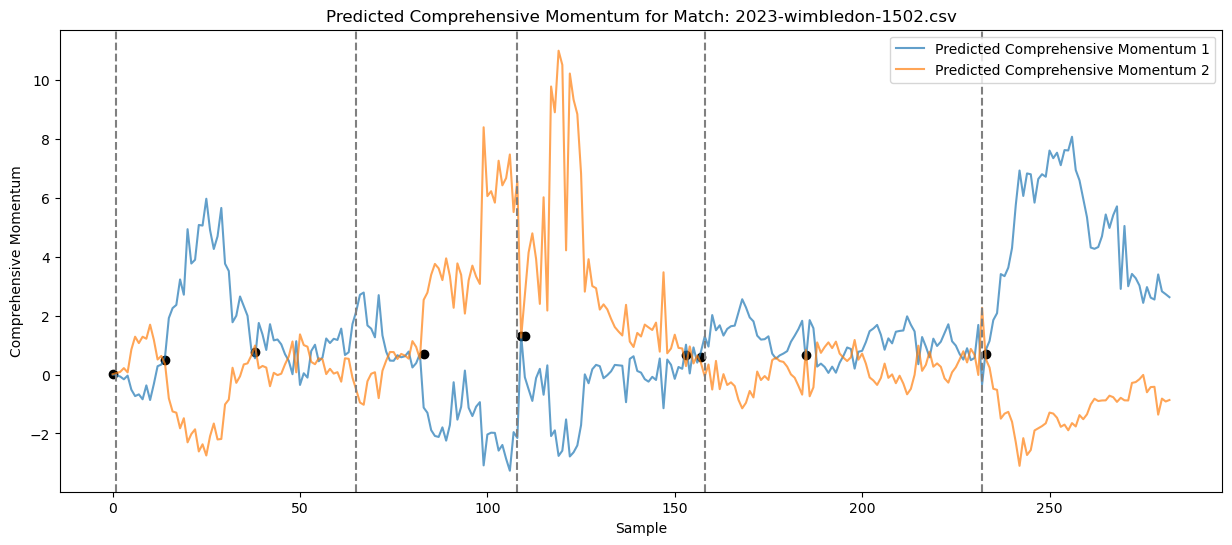

Match: 2023-wimbledon-1503.csv
Intersection 1: (x=0, y=0.0) - Change in Momentum 1: -6.39, Change in Momentum 2: 3.27
Match: 2023-wimbledon-1503.csv
Intersection 2: (x=24, y=0.55) - Change in Momentum 1: 0.66, Change in Momentum 2: -0.62
Match: 2023-wimbledon-1503.csv
Intersection 3: (x=44, y=0.66) - Change in Momentum 1: -0.37, Change in Momentum 2: 0.52
Match: 2023-wimbledon-1503.csv
Intersection 4: (x=84, y=0.92) - Change in Momentum 1: -0.72, Change in Momentum 2: 0.62
Match: 2023-wimbledon-1503.csv
Intersection 5: (x=104, y=1.21) - Change in Momentum 1: 4.55, Change in Momentum 2: -9.07
Match: 2023-wimbledon-1503.csv
Intersection 6: (x=133, y=0.81) - Change in Momentum 1: 2.48, Change in Momentum 2: -2.28
Match: 2023-wimbledon-1503.csv
Intersection 7: (x=177, y=0.64) - Change in Momentum 1: -0.31, Change in Momentum 2: 0.36
Match: 2023-wimbledon-1503.csv
Intersection 8: (x=180, y=0.58) - Change in Momentum 1: 0.21, Change in Momentum 2: -0.36


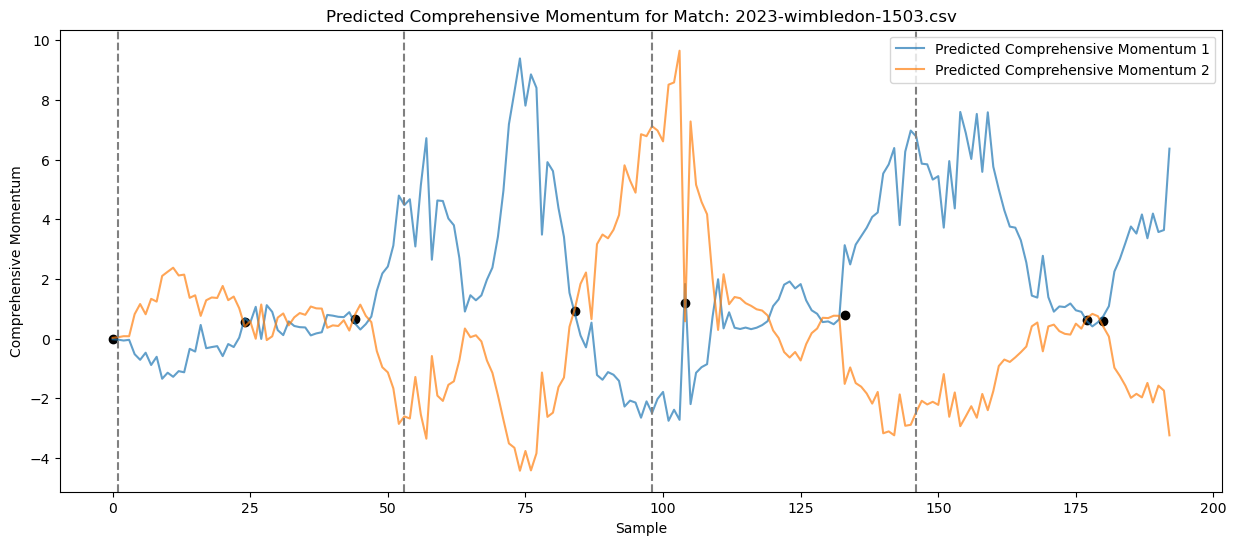

Match: 2023-wimbledon-1504.csv
Intersection 1: (x=16, y=0.49) - Change in Momentum 1: 2.06, Change in Momentum 2: -1.95
Match: 2023-wimbledon-1504.csv
Intersection 2: (x=31, y=0.48) - Change in Momentum 1: -1.02, Change in Momentum 2: 0.86
Match: 2023-wimbledon-1504.csv
Intersection 3: (x=56, y=0.55) - Change in Momentum 1: 0.58, Change in Momentum 2: -0.84
Match: 2023-wimbledon-1504.csv
Intersection 4: (x=72, y=0.85) - Change in Momentum 1: -2.36, Change in Momentum 2: 2.04
Match: 2023-wimbledon-1504.csv
Intersection 5: (x=114, y=0.61) - Change in Momentum 1: 0.38, Change in Momentum 2: -0.50
Match: 2023-wimbledon-1504.csv
Intersection 6: (x=130, y=0.63) - Change in Momentum 1: -0.73, Change in Momentum 2: 0.66
Match: 2023-wimbledon-1504.csv
Intersection 7: (x=154, y=0.67) - Change in Momentum 1: -0.62, Change in Momentum 2: 0.40
Match: 2023-wimbledon-1504.csv
Intersection 8: (x=181, y=0.74) - Change in Momentum 1: 0.30, Change in Momentum 2: -0.32
Match: 2023-wimbledon-1504.csv
Inter

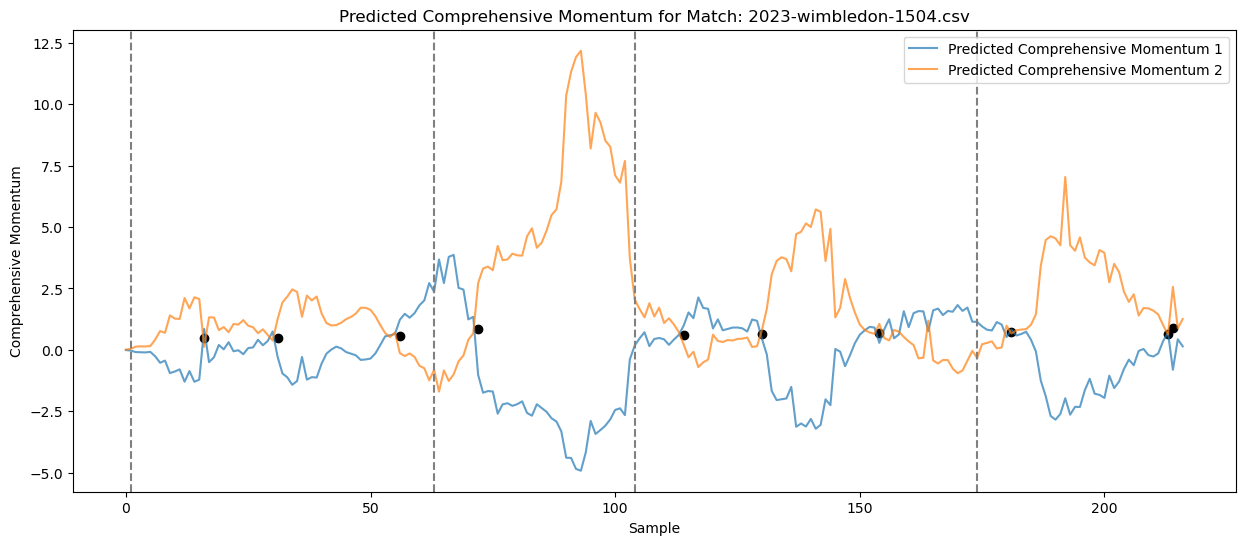

Match: 2023-wimbledon-1601.csv
Intersection 1: (x=19, y=0.51) - Change in Momentum 1: -1.25, Change in Momentum 2: 1.43
Match: 2023-wimbledon-1601.csv
Intersection 2: (x=36, y=0.47) - Change in Momentum 1: 0.39, Change in Momentum 2: -0.47
Match: 2023-wimbledon-1601.csv
Intersection 3: (x=66, y=0.68) - Change in Momentum 1: -0.56, Change in Momentum 2: 0.17
Match: 2023-wimbledon-1601.csv
Intersection 4: (x=67, y=0.79) - Change in Momentum 1: 1.49, Change in Momentum 2: -1.27
Match: 2023-wimbledon-1601.csv
Intersection 5: (x=131, y=1.1) - Change in Momentum 1: -0.53, Change in Momentum 2: 0.57
Match: 2023-wimbledon-1601.csv
Intersection 6: (x=156, y=0.97) - Change in Momentum 1: 4.44, Change in Momentum 2: -2.99


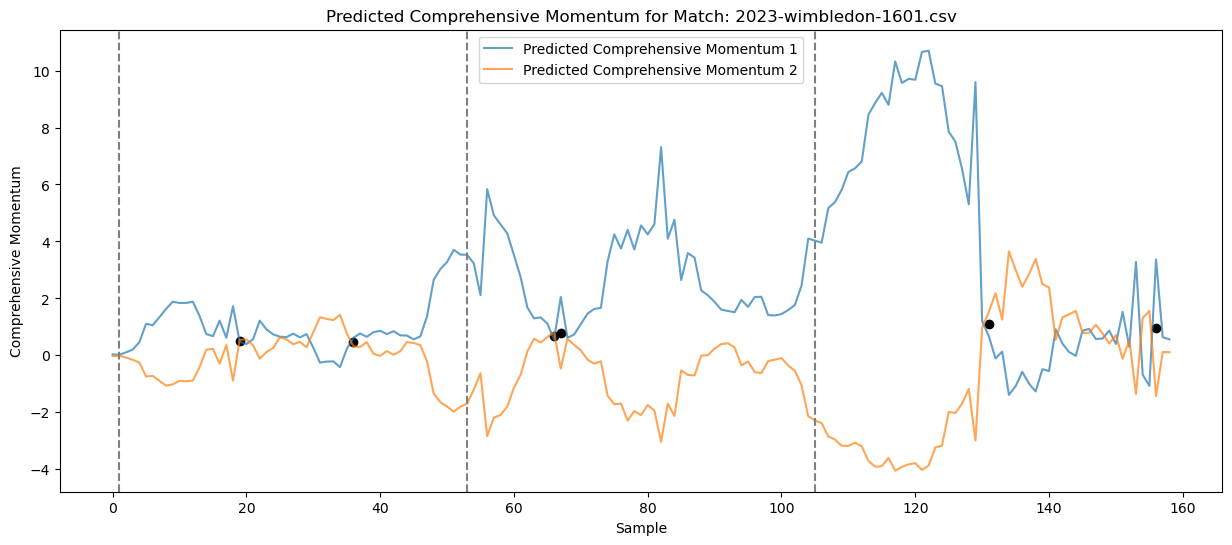

Match: 2023-wimbledon-1602.csv
Intersection 1: (x=6, y=0.05) - Change in Momentum 1: -0.27, Change in Momentum 2: 0.34
Match: 2023-wimbledon-1602.csv
Intersection 2: (x=96, y=0.78) - Change in Momentum 1: 0.66, Change in Momentum 2: -0.55
Match: 2023-wimbledon-1602.csv
Intersection 3: (x=194, y=0.48) - Change in Momentum 1: 0.49, Change in Momentum 2: -0.76


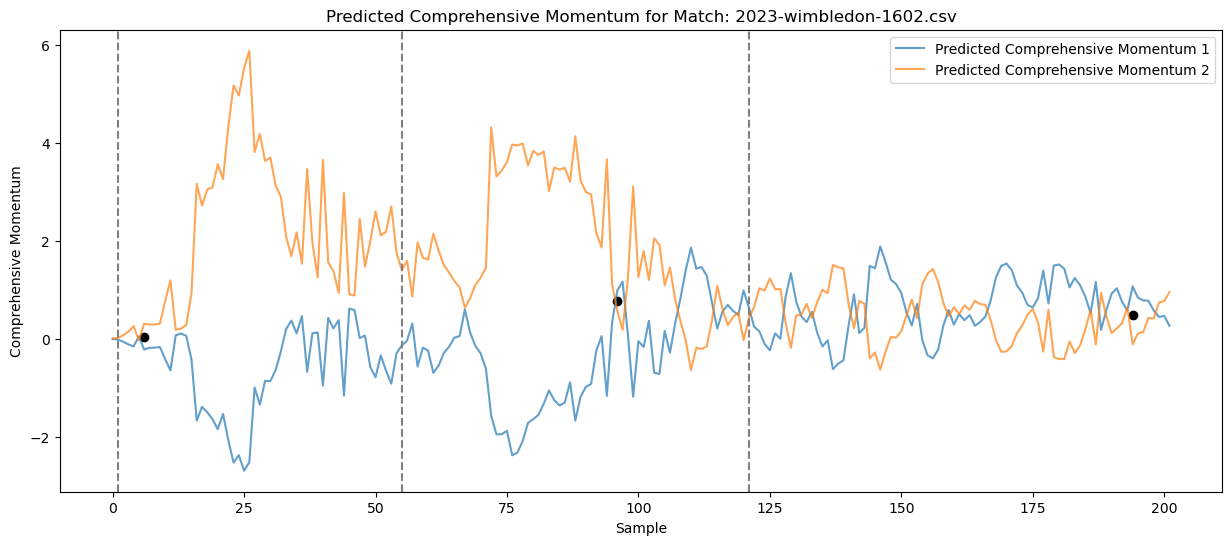

Match: 2023-wimbledon-1701.csv
Intersection 1: (x=0, y=0.0) - Change in Momentum 1: -0.74, Change in Momentum 2: -0.47
Match: 2023-wimbledon-1701.csv
Intersection 2: (x=59, y=0.81) - Change in Momentum 1: 0.99, Change in Momentum 2: -0.82
Match: 2023-wimbledon-1701.csv
Intersection 3: (x=75, y=0.44) - Change in Momentum 1: -0.54, Change in Momentum 2: 0.51
Match: 2023-wimbledon-1701.csv
Intersection 4: (x=107, y=0.62) - Change in Momentum 1: -0.64, Change in Momentum 2: 0.64
Match: 2023-wimbledon-1701.csv
Intersection 5: (x=146, y=0.97) - Change in Momentum 1: 1.48, Change in Momentum 2: -2.35
Match: 2023-wimbledon-1701.csv
Intersection 6: (x=237, y=0.69) - Change in Momentum 1: -0.54, Change in Momentum 2: 0.27
Match: 2023-wimbledon-1701.csv
Intersection 7: (x=253, y=0.67) - Change in Momentum 1: -1.34, Change in Momentum 2: 1.26
Match: 2023-wimbledon-1701.csv
Intersection 8: (x=273, y=0.92) - Change in Momentum 1: 3.22, Change in Momentum 2: -3.03
Match: 2023-wimbledon-1701.csv
Inter

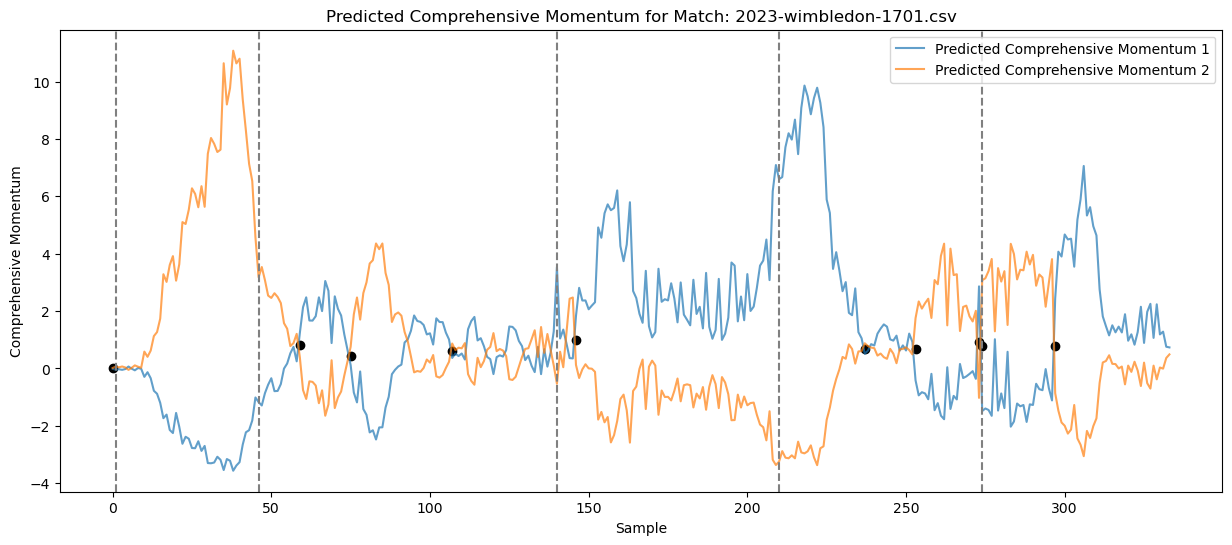

215


In [18]:
import os

count = 0
intersections_data = []
intersections_feature = ['p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph', 'serve_width_B', 'serve_width_BC', 'serve_width_BW', 'serve_width_C', 'serve_width_W', 'serve_depth_CTL', 'serve_depth_NCTL', 'return_depth_D', 'return_depth_ND', 'server']
# 为每场比赛单独进行预测并绘制曲线
for file in file_list:
    df = pd.read_csv(file)

    # 创建特征列的副本来处理缺失值
    features_df = df[feature_columns].copy()
    features_df = features_df.apply(pd.to_numeric, errors='coerce')
    features_df.fillna(features_df.mean(), inplace=True)

    # 检查是否还有缺失值
    if features_df.isnull().values.any():
        print(f"Warning: Missing values detected in file {file}.")
        continue

    # 标准化
    X_match = scaler.transform(features_df)

    # 预测
    y_pred_match = model.predict(X_match)
    
    # 寻找交点
    intersections = find_intersections_and_changes(y_pred_match[:, 0], y_pred_match[:, 1])

    # 收集交点信息及相应的特征
    for i, (x, y, change_1, change_2) in enumerate(intersections):
        match_name = os.path.basename(file)
        label = 1 if change_1 > 0 else 0  # Player1的change由坏转好为1，由好转坏为0
        intersection_info = {'Label': label}

        # 提取相应样本的特征值
        for feature in intersections_feature:
            intersection_info[feature] = features_df.loc[x, feature]

        intersections_data.append(intersection_info)

    # 将收集到的数据转换为DataFrame
    intersections_df = pd.DataFrame(intersections_data)
    
    # 保存交点信息到新表
    intersections_df.to_csv('intersections_data_1.csv', index=False)



    # 打印交点信息和分数变化
    for i, (x, y, change_1, change_2) in enumerate(intersections, 1):        
        print(f"Match: {os.path.basename(file)}")
        print(f"Intersection {i}: (x={x}, y={round(y, 2)}) - Change in Momentum 1: {change_1:.2f}, Change in Momentum 2: {change_2:.2f}")
        count += 1

    # 绘制曲线
    plt.figure(figsize=(15, 6))
    plt.plot(y_pred_match[:, 0], label='Predicted Comprehensive Momentum 1', alpha=0.7)
    plt.plot(y_pred_match[:, 1], label='Predicted Comprehensive Momentum 2', alpha=0.7)
    
    # 添加盘结束的垂直线
    last_set_no = 0
    for i, row in df.iterrows():
        if row['set_no'] != last_set_no:
            plt.axvline(x=row['point_no'], color='grey', linestyle='--')
            last_set_no = row['set_no']
    
    for x, y, _, _ in intersections:
        plt.scatter(x, y, color='black')
    plt.title(f'Predicted Comprehensive Momentum for Match: {os.path.basename(file)}')
    plt.xlabel('Sample')
    plt.ylabel('Comprehensive Momentum')
    plt.legend()
    plt.show()

print(count)

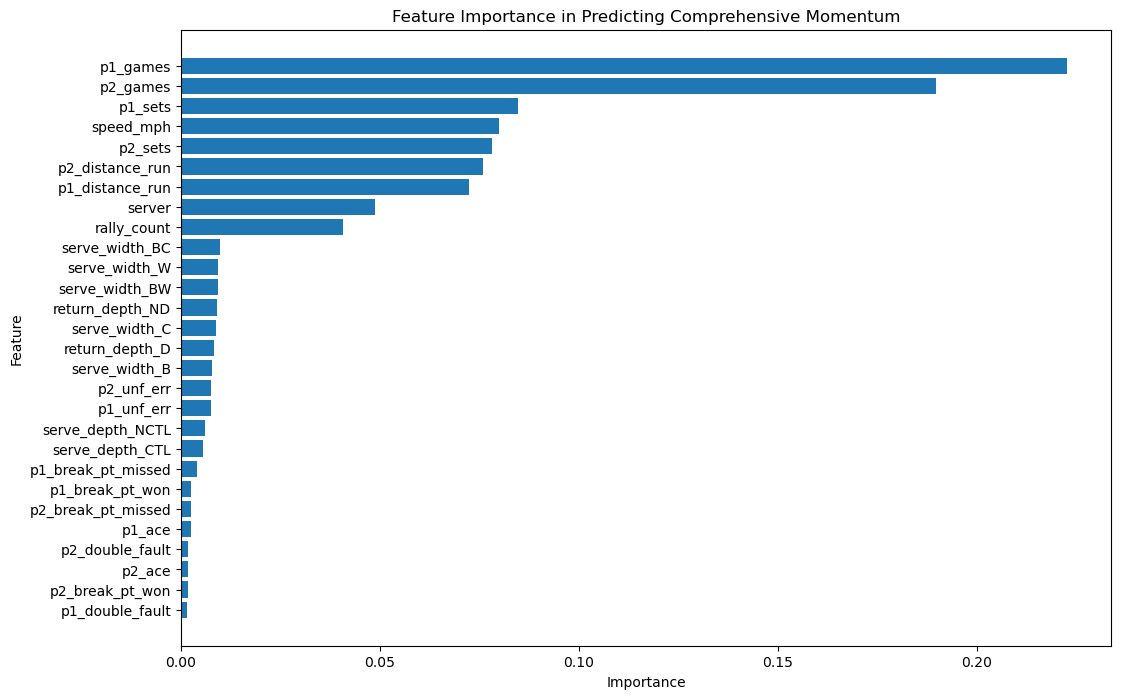

In [19]:
"""
特征重要性
"""
feature_importances = model.feature_importances_

# 将特征和其重要性组合为DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

# 排序特征重要性
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Comprehensive Momentum')
plt.gca().invert_yaxis()
plt.show()